In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

### Loading the Data

In [2]:
# group seasons and return df grouped by player ID
def combine_seasons(seasons):
    # load first season of group
    final = pd.read_csv(seasons[0])
    final = final.drop_duplicates(subset='Id', keep="first")
    
    for season in seasons[1:]:
        df = pd.read_csv(season)
        
        # first line for each player has their totals for the year
        df = df.drop_duplicates(subset='Id', keep="first")
        
        # add stats to previous seasons
        final = pd.concat([final, df])
        
    # group by player ID and get mean stats    
    final = final.groupby(['Id']).agg({'Rk': 'first',
                                       'Player': 'first',
                                       'Age': 'mean',
                                       'Tm': 'last',
                                       'Pos': 'last',
                                       'GP': 'mean',
                                       'G': 'mean',
                                       'A': 'mean',
                                       'PTS': 'mean',
                                       '+/-': 'mean',
                                       'PIM': 'mean',
                                       'PS': 'mean',
                                       'EV': 'mean',
                                       'PP': 'mean',
                                       'SH': 'mean',
                                       'GW': 'mean',
                                       'EV.1': 'mean',
                                       'PP.1': 'mean',
                                       'SH.1': 'mean',
                                       'S': 'mean',
                                       'S%': 'mean'})
    
    final = final.reset_index()

    final = final.sort_values(by=['GP'], ascending=False)
    final = final.head(int(len(final)*(75/100)))
    final = final.sort_values(by=['Rk'], ascending=True)
        
    return final

In [3]:
# forming the groups
group1 = ['data/89-90.csv', 'data/90-91.csv', 
          'data/91-92.csv', 'data/92-93.csv', 'data/93-94.csv']

group2 = ['data/94-95.csv', 'data/95-96.csv', 
          'data/96-97.csv', 'data/97-98.csv', 'data/98-99.csv']

group3 = ['data/99-00.csv', 'data/00-01.csv', 
          'data/01-02.csv', 'data/02-03.csv', 'data/03-04.csv']

group4 = ['data/05-06.csv', 'data/06-07.csv', 
          'data/07-08.csv', 'data/08-09.csv', 'data/09-10.csv']

group5 = ['data/10-11.csv', 'data/11-12.csv', 
          'data/12-13.csv', 'data/13-14.csv', 'data/14-15.csv']

group6 = ['data/15-16.csv', 'data/16-17.csv', 
          'data/17-18.csv', 'data/18-19.csv', 'data/19-20.csv']

In [4]:
# getting dataframes for each group
group1 = combine_seasons(group1)
group2 = combine_seasons(group2)
group3 = combine_seasons(group3)
group4 = combine_seasons(group4)
group5 = combine_seasons(group5)
group6 = combine_seasons(group6)

In [5]:
group6

Id   Rk             Player   Age   Tm Pos     GP      G      A  \
1     abdelju01    1  Justin Abdelkader  30.0  DET  LW  68.20   9.00  15.00   
4     acciano01    2       Noel Acciari  26.0  FLA   C  49.20   7.60   4.00   
5     agostke01    3     Kenny Agostino  24.5  TOT  LW  19.25   1.75   5.25   
2     abergpo01    3       Pontus Aberg  24.5  TOR  LW  33.00   4.25   6.75   
10    alzneka01    5        Karl Alzner  29.0  MTL   D  51.80   1.60   7.80   
...         ...  ...                ...   ...  ...  ..    ...    ...    ...   
1443  zidlima01  894     Marek Zidlicky  38.0  NYI   D  53.00   4.00  12.00   
1445  zubruda01  896     Dainius Zubrus  37.0  SJS   C  50.00   3.00   4.00   
1446  zuccama01  897    Mats Zuccarello  30.0  MIN  LW  70.80  16.80  33.20   
1447  zuckeja01  898       Jason Zucker  26.0  TOT  LW  74.60  21.80  21.60   
1435  zadinfi01  898       Filip Zadina  19.5  DET  RW  18.50   4.50   4.50   

       PTS  ...    PS     EV    PP   SH   GW  EV.1   PP.1  SH.1       S  \
1     24.0  ...  1.24   5.60  3.20  0.2  1.0  11.8   3.00   0.2  100.80   
4     11.6  ...  0.80   7.20  0.00  0.4  1.4   4.0   0.00   0.0   63.00   
5      7.0  ...  0.45   1.75  0.00  0.0  0.0   3.5   1.75   0.0   27.50   
2     11.0  ...  0.80   3.50  0.75  0.0  1.0   5.5   1.25   0.0   46.75   
10     9.4  ...  2.58   1.60  0.00  0.0  0.2   7.6   0.00   0.2   50.40   
...    ...  ...   ...    ...   ...  ...  ...   ...    ...   ...     ...   
1443  16.0  ...  3.40   4.00  0.00  0.0  1.0   8.0   4.00   0.0   48.00   
1445   7.0  ...  0.40   3.00  0.00  0.0  0.0   4.0   0.00   0.0   33.00   
1446  50.0  ...  4.82  13.00  3.80  0.0  2.6  22.8  10.40   0.0  146.60   
1447  43.4  ...  5.00  17.00  4.40  0.4  4.0  16.6   4.60   0.4  175.40   
1435   9.0  ...  0.65   2.00  2.50  0.0  0.5   2.5   2.00   0.0   39.00   

          S%  
1      7.420  
4      9.620  
5      3.375  
2      6.475  
10     2.040  
...      ...  
1443   8.300  
1445   9.100  
1446  11.940  
1447  12.740  
1435   9.450  

[1086 rows x 22 columns]

### Pairplots

In [6]:
# sns.pairplot(group1, vars=['GP', 'G', 'A', 'PTS', '+/-', 'S', 'S%'], hue='Pos')
# plt.savefig('figs/group1_pair.png')

In [7]:
# sns.pairplot(group2, vars=['GP', 'G', 'A', 'PTS', '+/-', 'S', 'S%'], hue='Pos')
# plt.savefig('figs/group2_pair.png')

In [8]:
# sns.pairplot(group3, vars=['GP', 'G', 'A', 'PTS', '+/-', 'S', 'S%'], hue='Pos')
# plt.savefig('figs/group3_pair.png')

In [9]:
# sns.pairplot(group4, vars=['GP', 'G', 'A', 'PTS', '+/-', 'S', 'S%'], hue='Pos')
# plt.savefig('figs/group4_pair.png')

In [10]:
# sns.pairplot(group5, vars=['GP', 'G', 'A', 'PTS', '+/-', 'S', 'S%'], hue='Pos')
# plt.savefig('figs/group5_pair.png')

In [11]:
# sns.pairplot(group6, vars=['GP', 'G', 'A', 'PTS', '+/-', 'S', 'S%'], hue='Pos')
# plt.savefig('figs/group6_pair.png')

### Prepping data

In [12]:
# Split groups into qual and quant features
def prep_group(group):
    players = group[['Player', 'Pos', 'Id']]
    X = group.drop(['Player', 'Pos', 'Id', 'Tm'], axis=1)
    
    # drop bottom X% of players by GP?
    
    return X, players

In [13]:
# get qual and quant features for each group
X1, player1 = prep_group(group1)
X2, player2 = prep_group(group2)
X3, player3 = prep_group(group3)
X4, player4 = prep_group(group4)
X5, player5 = prep_group(group5)
X6, player6 = prep_group(group6)

In [14]:
player1.head(2)

Player Pos         Id
0  Keith Acton   C  actonke01
2   Greg Adams  LW  adamsgr02

In [15]:
X1.head(2)

Rk   Age    GP     G     A   PTS  +/-   PIM    PS    EV   PP   SH   GW  \
0   1  33.0  71.0   8.8  13.8  22.6 -6.0  86.2  0.40   7.8  0.4  0.6  0.8   
2   2  28.0  63.4  23.8  25.2  49.0  5.0  17.6  4.24  14.6  8.4  0.8  2.6   

   EV.1  PP.1  SH.1      S     S%  
0  12.2   1.0   0.6   80.4  10.18  
2  16.6   6.8   1.8  155.2  15.34

### Clustering

#### Writing clustering function

In [16]:
# build clustering func
def cluster_groups(X, player):
    names = player.Player.values
    range_n_clusters = [2, 3, 4, 5, 6]

    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        ax1.set_xlim([-0.5, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        pipe = Pipeline([
            ('imputer', SimpleImputer(strategy="median")),
            ('scale',StandardScaler()),
            ('pca', PCA(n_components=2,random_state=671)),
            ('cluster', KMeans(n_clusters=n_clusters) ),
        ])
        cluster_labels = pipe.fit_predict(X)
        Xtransformed = pipe.transform(X) # imputed and scaled, fed to pca, and return results
        Xtransformed2 = pd.concat([pd.DataFrame({'who':names}),pd.DataFrame(Xtransformed)],axis=1)

        # return Xtransformed
        clusterer = pipe.named_steps.cluster

        # The silhouette_score gives the average value for all the samples.
        silhouette_avg = silhouette_score(Xtransformed, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(Xtransformed, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

        x = sns.scatterplot(x=Xtransformed[:, 0], y=Xtransformed[:, 1], marker='o', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')
        goons = ['Dale Hunter', 'Sean Avery', 'Marty McSorley', 'Bob Propert',
                 'Rob Ray', 'Craig Berube', 'Tim Hunter', 'Tie Domi', 'Donald Brashear',
                 'Shane Churla', 'Milan Lucic', 'Tom Wilson']
        for line in range(0,Xtransformed2.shape[0]):
            if Xtransformed2['who'][line] in goons:
                 x.text(Xtransformed2[0][line]+0.01, Xtransformed2[1][line], 
                 Xtransformed2['who'][line], horizontalalignment='left', 
                 size='medium', color=colors[line])

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

#### Scree plot function

In [17]:
def scree_plot(X):
    scores = []
    for n_clusters in range(1, 6):
        pipe = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('scale',StandardScaler()),
        ('pca', PCA(n_components=2,random_state=671)),
        ])

        Xtransformed = pipe.fit_transform(X)
        
        kmeans = KMeans(n_clusters = n_clusters)
        kmeans.fit(Xtransformed)
        scores.append(-kmeans.score(Xtransformed))

    plt.scatter(list(range(1, 6)), scores)
    plt.xticks([1,2,3,4,5,6])
    plt.show()

#### Group 1 clusters

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.6300640889159501


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5334077290522501


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.501819765987299


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.40137437588828057


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.35504341301768433


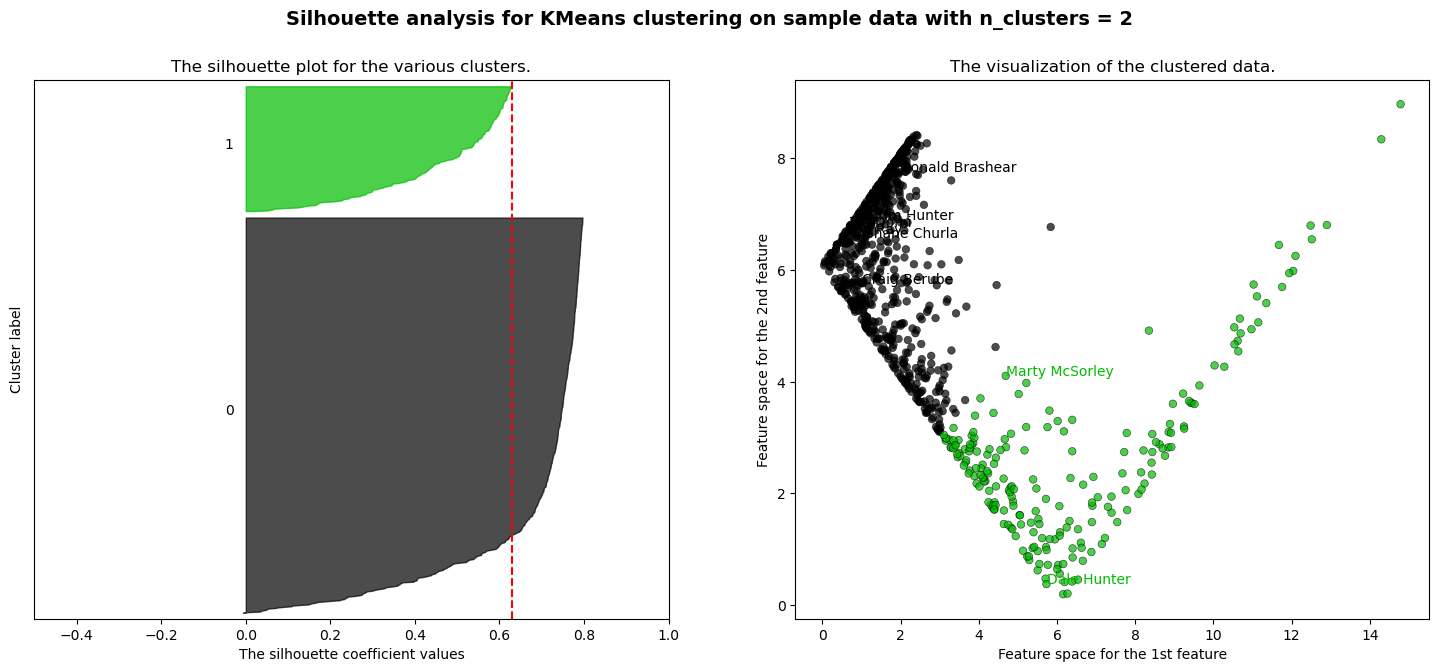

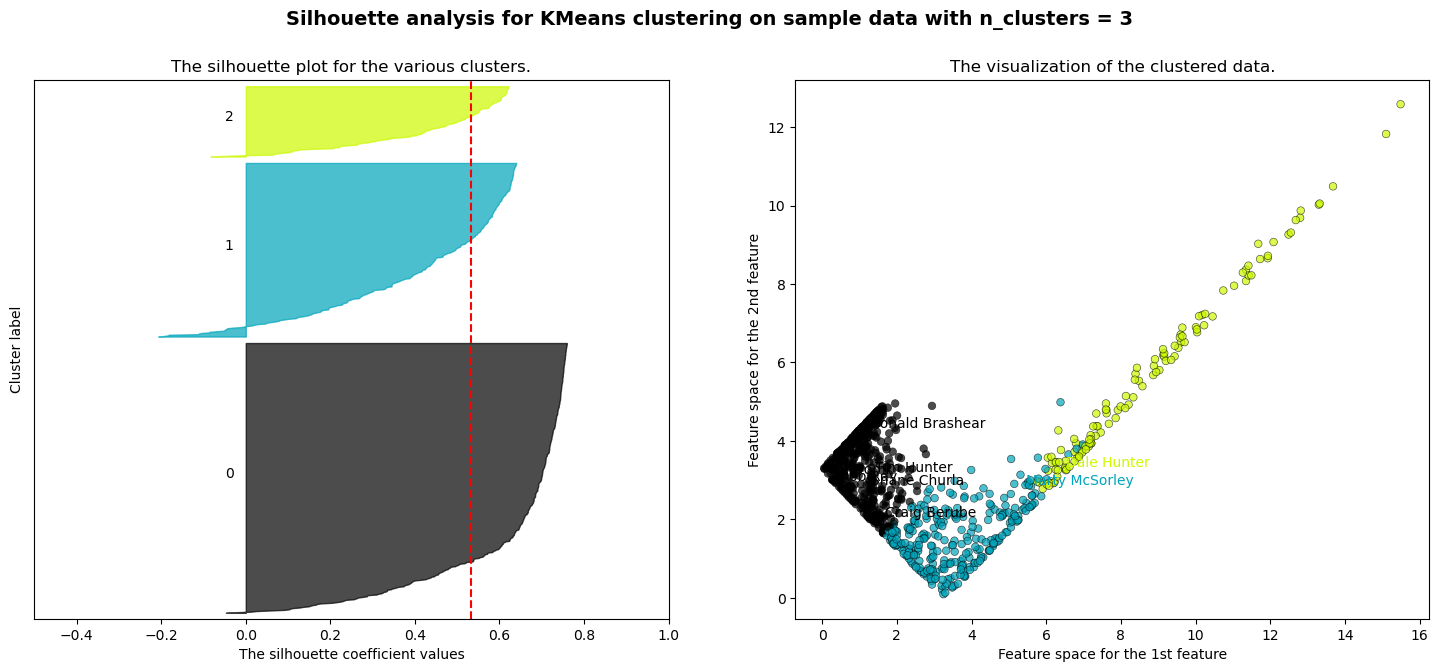

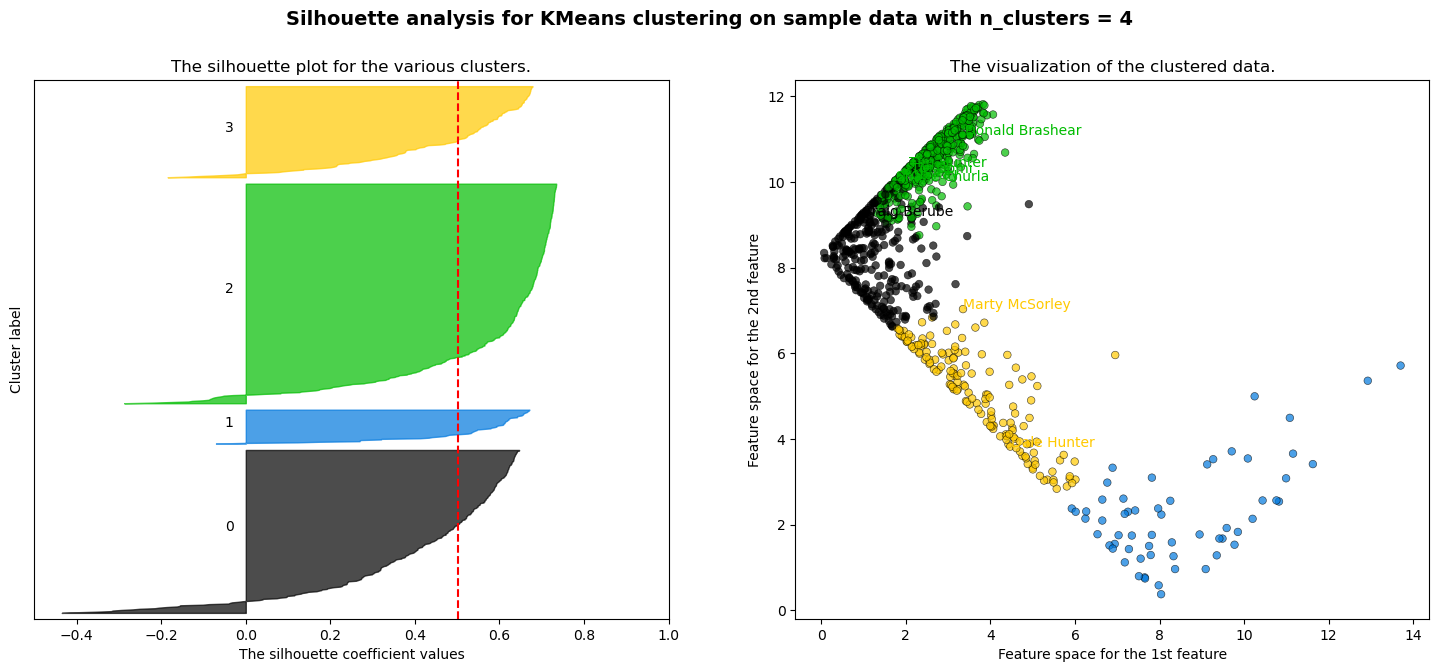

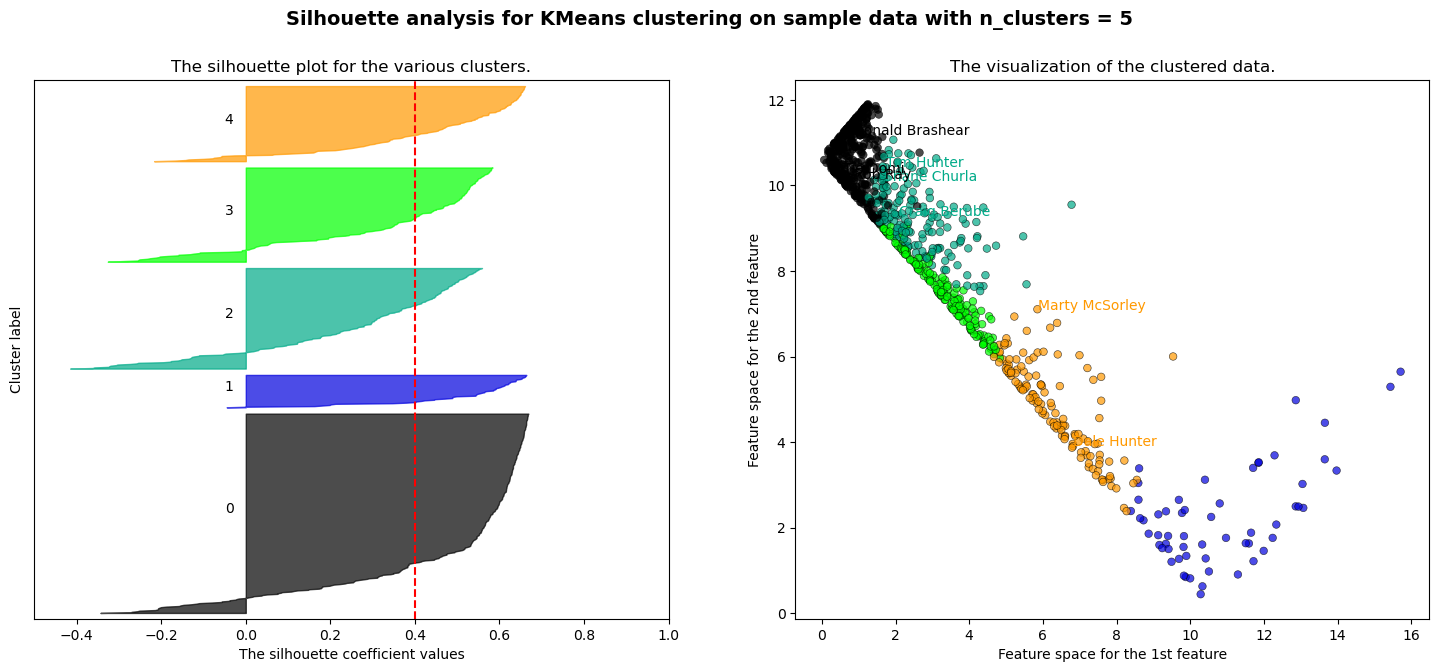

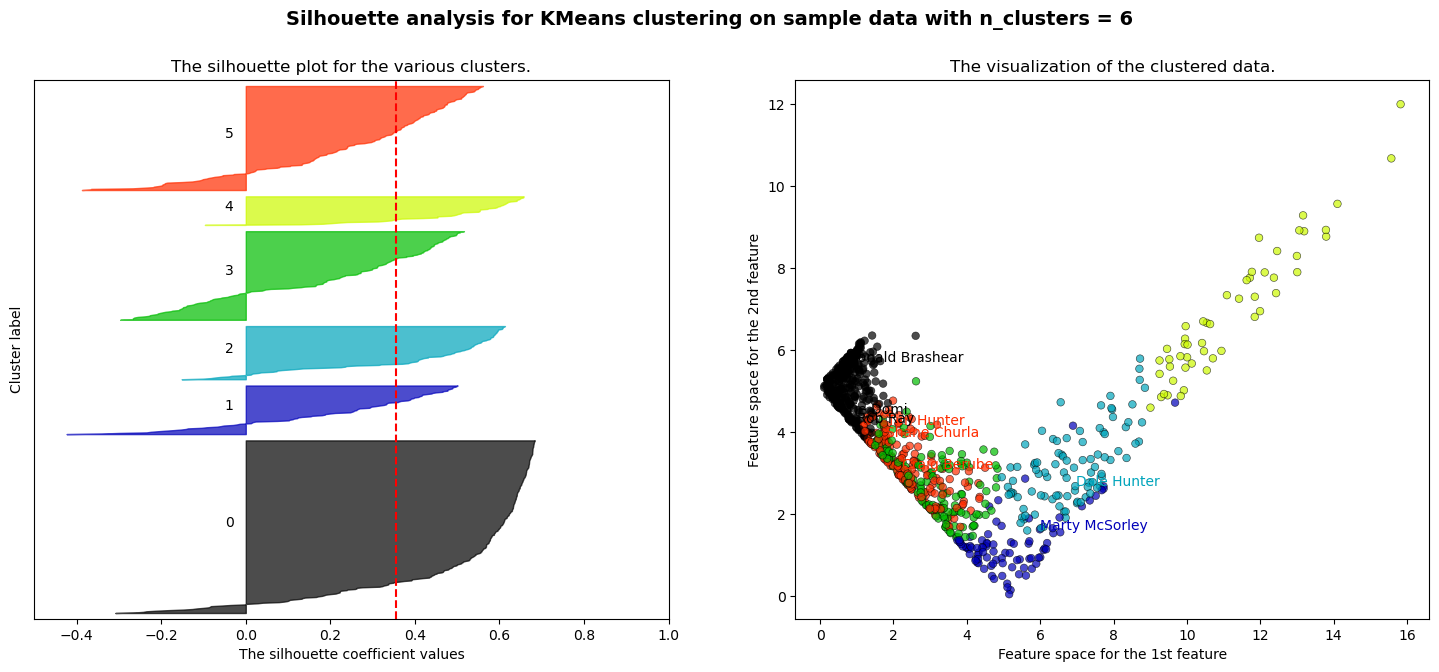

In [18]:
cluster_groups(X1, player1)

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMe

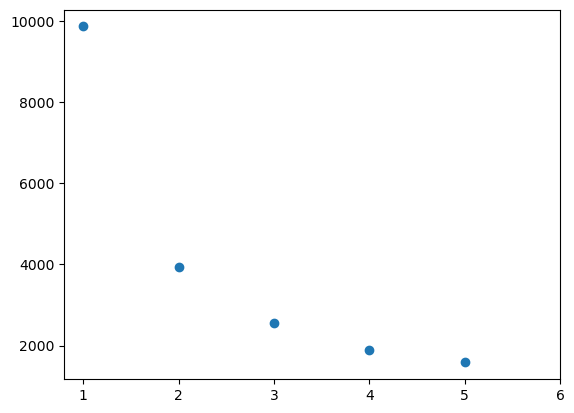

In [19]:
scree_plot(X1)

#### Group 2 clusters

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.6078328436817062


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.570032262438103


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.5478847943760125


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.37555084641217634


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.3319046059312547


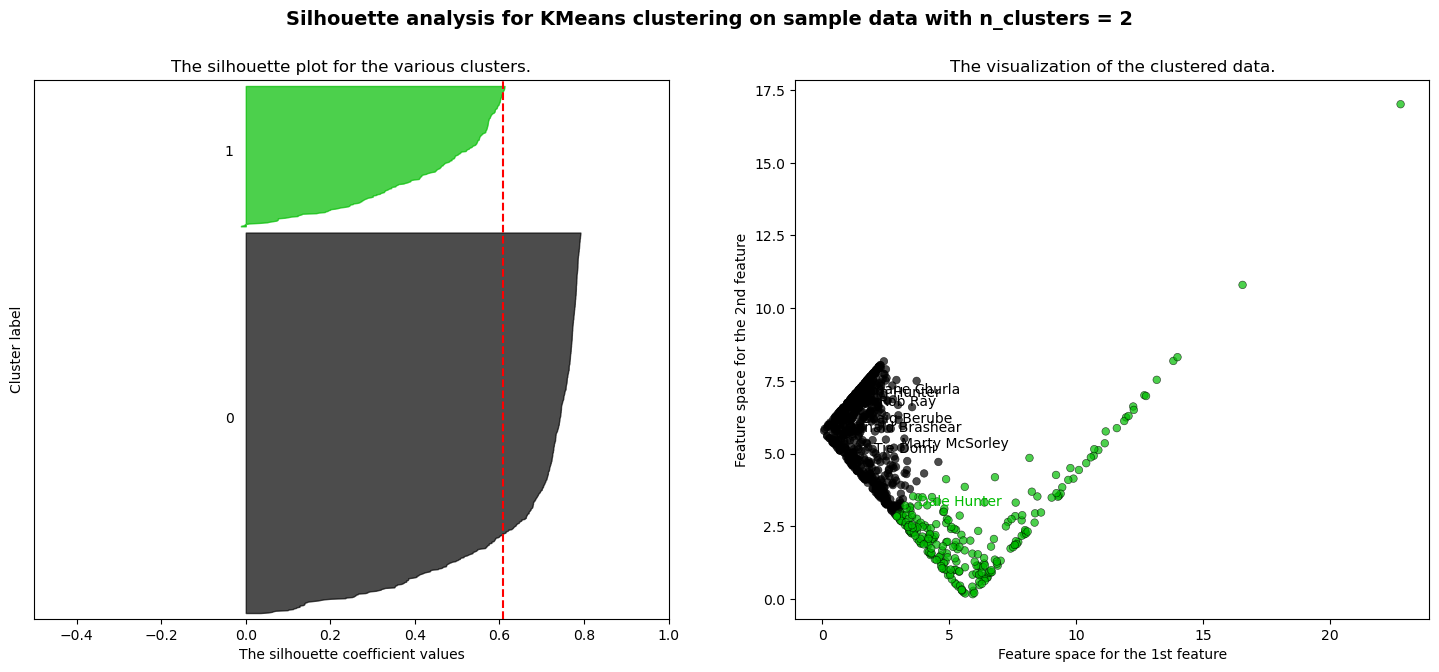

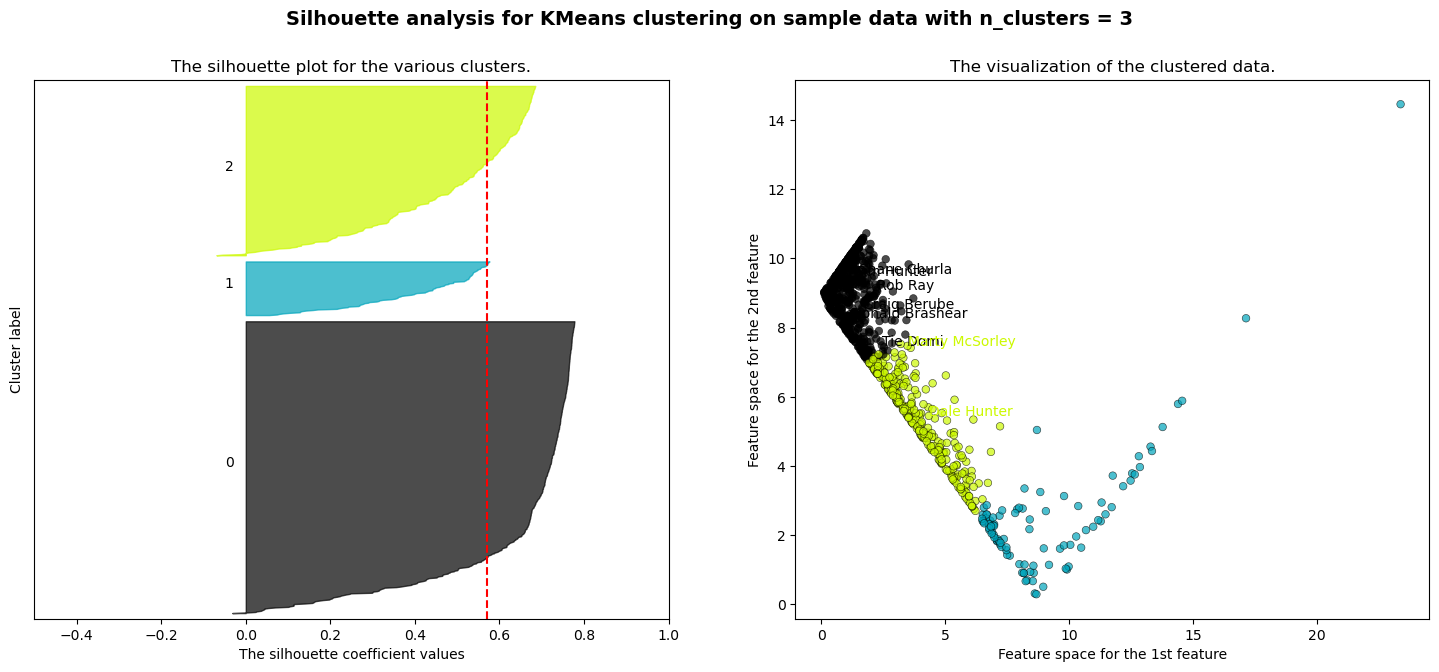

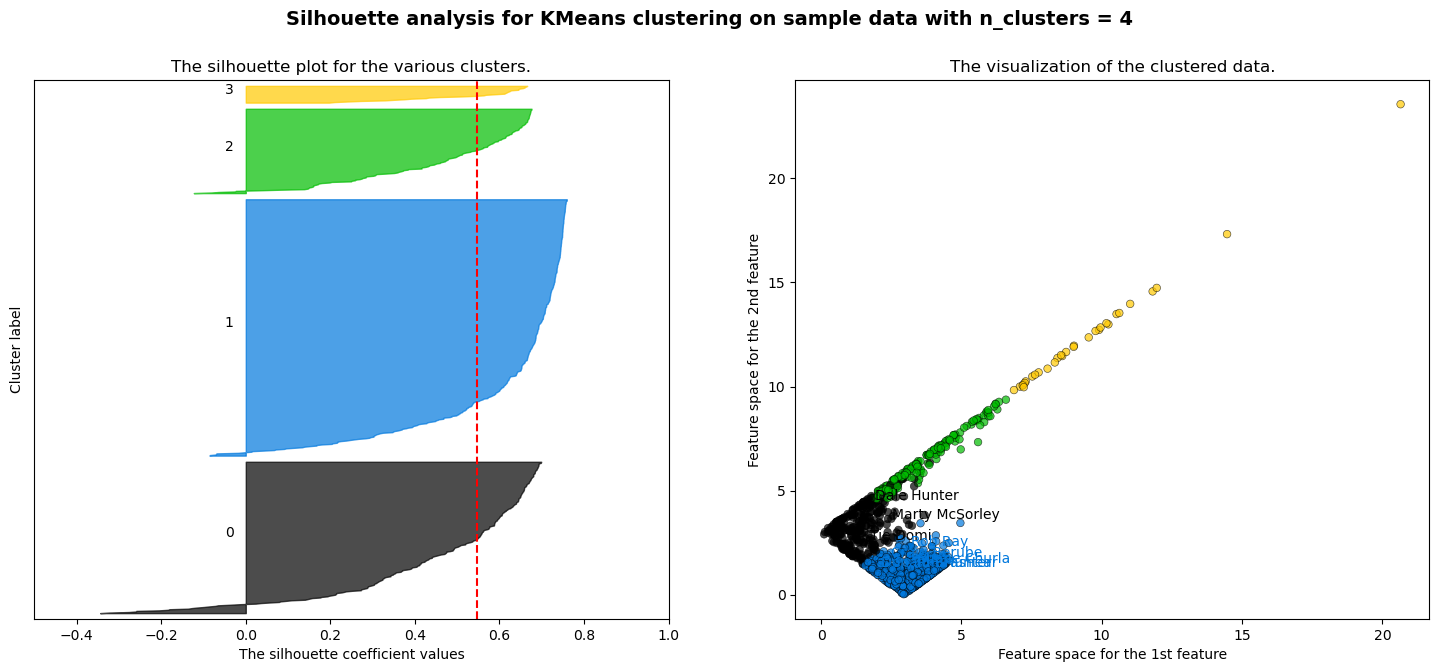

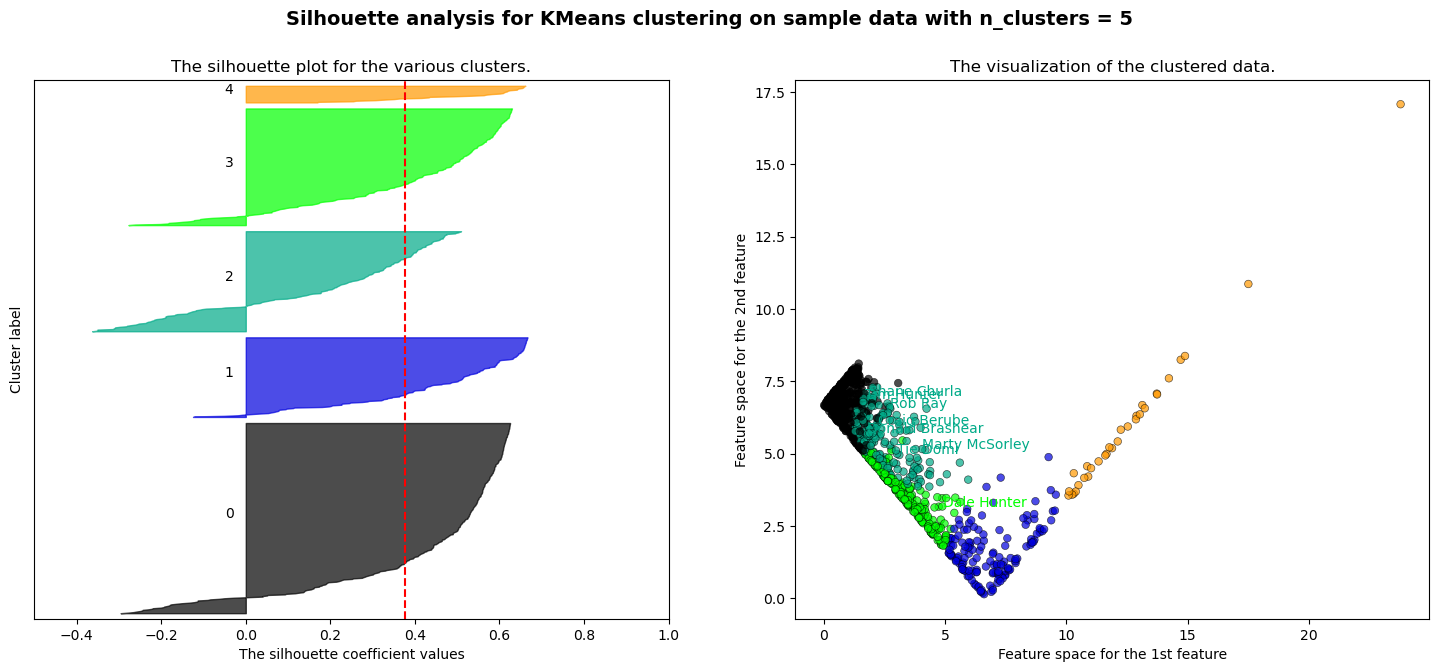

In [ ]:
cluster_groups(X2, player2)

In [ ]:
scree_plot(X2)

#### Group 3 clusters

In [ ]:
cluster_groups(X3, player3)

In [ ]:
scree_plot(X3)

#### Group 4 clusters

In [ ]:
cluster_groups(X4, player4)

In [ ]:
scree_plot(X4)

#### Group 5 clusters

In [ ]:
cluster_groups(X5, player5)

In [ ]:
scree_plot(X5)

#### Group 6 clusters

In [ ]:
cluster_groups(X6, player6)

In [ ]:
scree_plot(X6)

### Next Section

In [ ]:
group1.head(5)

In [ ]:
def get_goons(group):
    n = 15 # returns top 15% PIM
    top_pim = group.copy()
    top_pim = top_pim.sort_values(by=['PIM'], ascending=False)
    top_pim = top_pim.head(int(len(group)*(n/100)))
    
    bot_pts = group.copy()
    bot_pts = bot_pts.sort_values(by=['PTS'], ascending=True)
    bot_pts = bot_pts.head(int(len(group)*(n/100)))
    
    goons = top_pim.merge(bot_pts, how='inner', left_on='Id', right_on='Id')
    
    return goons

In [64]:
x = get_goons(group1)
# x.PIM.sort_values()
x

Empty DataFrame
Columns: [Id, Rk_x, Player_x, Age_x, Tm_x, Pos_x, GP_x, G_x, A_x, PTS_x, +/-_x, PIM_x, PS_x, EV_x, PP_x, SH_x, GW_x, EV.1_x, PP.1_x, SH.1_x, S_x, S%_x, Rk_y, Player_y, Age_y, Tm_y, Pos_y, GP_y, G_y, A_y, PTS_y, +/-_y, PIM_y, PS_y, EV_y, PP_y, SH_y, GW_y, EV.1_y, PP.1_y, SH.1_y, S_y, S%_y]
Index: []

[0 rows x 43 columns]

### Clustering without PCA

#### Clustering func without pca

In [33]:
def cluster_no_pca(X, player):
    names = player.Player.values
    range_n_clusters = [2, 3, 4, 5, 6]

    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        ax1.set_xlim([-0.5, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        pipe = Pipeline([
            ('imputer', SimpleImputer(strategy="median")),
            ('scale',StandardScaler()),
        ])
        
        Xtransformed = pipe.fit_transform(X)
        clustering = KMeans(n_clusters=n_clusters, random_state=671)
        clustering.fit(Xtransformed)
        
        cluster_labels = clustering.predict(Xtransformed)
        
        # imputed and scaled, fed to pca, and return results
        Xtransformed2 = pd.concat([pd.DataFrame({'who':names}),pd.DataFrame(Xtransformed)],axis=1)

        # return Xtransformed
        clusterer = clustering

        # The silhouette_score gives the average value for all the samples.
        silhouette_avg = silhouette_score(Xtransformed, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(Xtransformed, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

        x = sns.scatterplot(x=Xtransformed[:, 5], y=Xtransformed[:, 7], marker='o', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')
        goons = ['Dale Hunter', 'Sean Avery', 'Marty McSorley', 'Bob Propert',
                 'Rob Ray', 'Craig Berube', 'Tim Hunter', 'Tie Domi', 'Donald Brashear',
                 'Shane Churla', 'Milan Lucic', 'Tom Wilson']
        for line in range(0, Xtransformed2.shape[0]):
            if Xtransformed2['who'][line] in goons:
                 x.text(Xtransformed2[5][line], Xtransformed2[7][line], 
                     Xtransformed2['who'][line], horizontalalignment='left', 
                     size='small', color=colors[line])

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Points")
        ax2.set_ylabel("Penalty Minutes")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

#### Group 1 w/o PCA

In [34]:
X1.columns

Index(['Rk', 'Age', 'GP', 'G', 'A', 'PTS', '+/-', 'PIM', 'PS', 'EV', 'PP',
       'SH', 'GW', 'EV.1', 'PP.1', 'SH.1', 'S', 'S%'],
      dtype='object')

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.4214684362395764


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.31028348954744106


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.2570948529126122


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.2628677511921028


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.26643707225170693


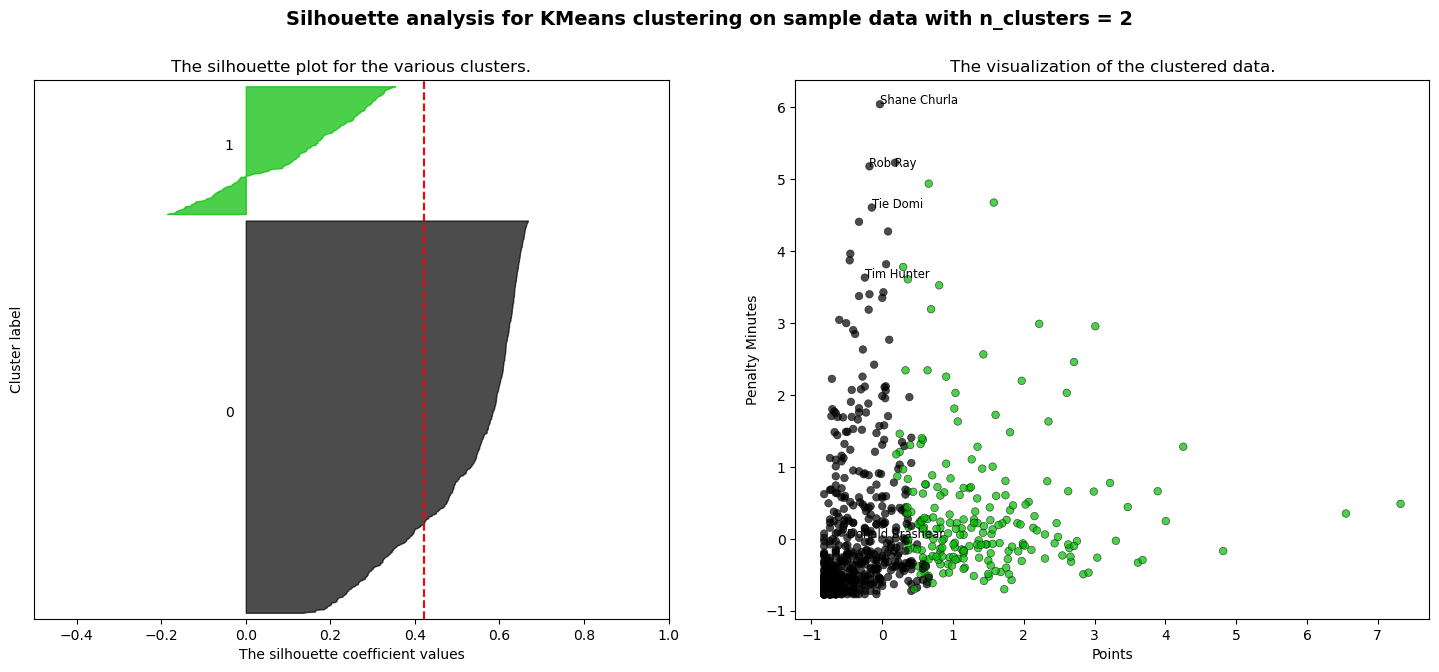

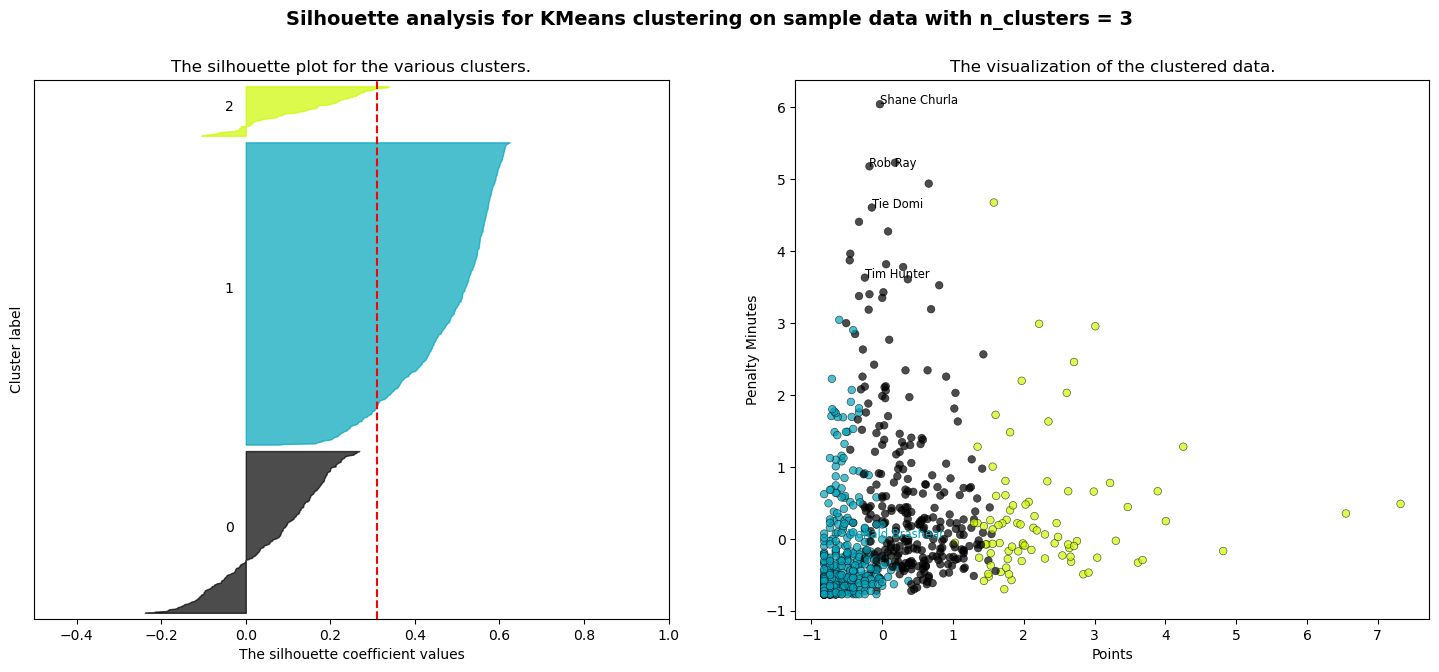

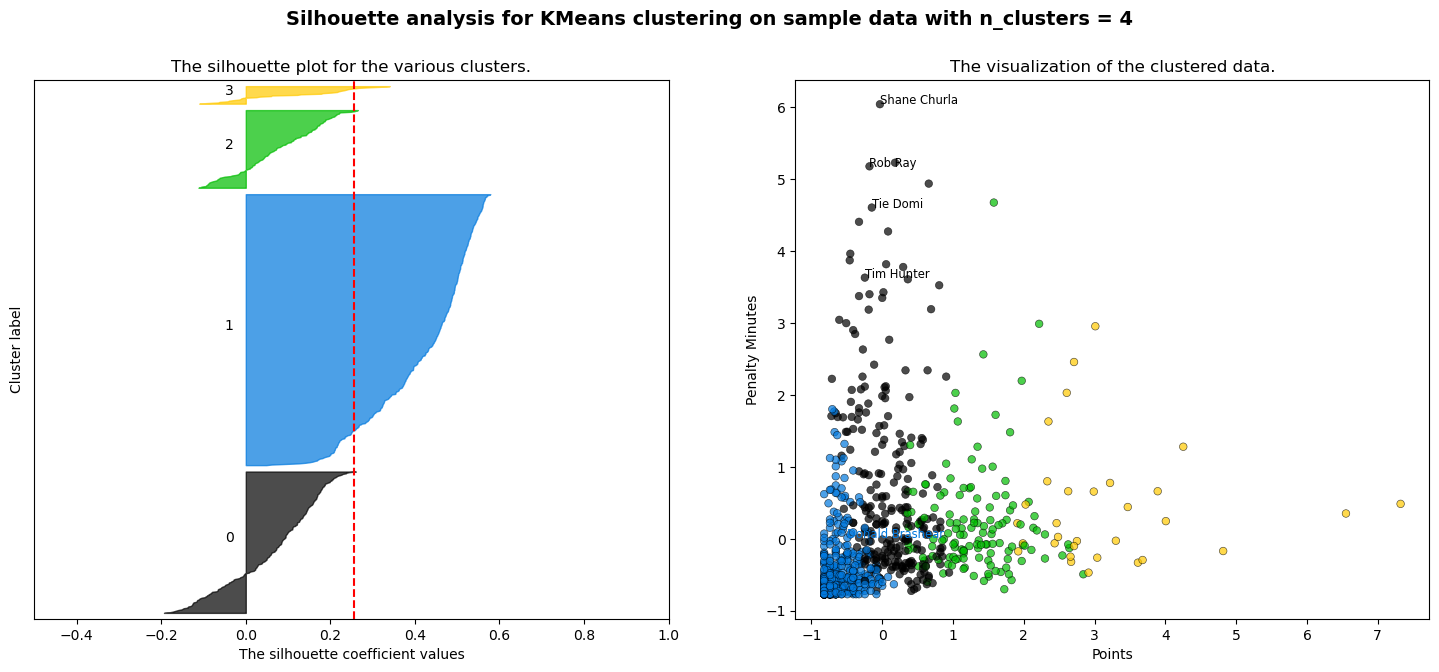

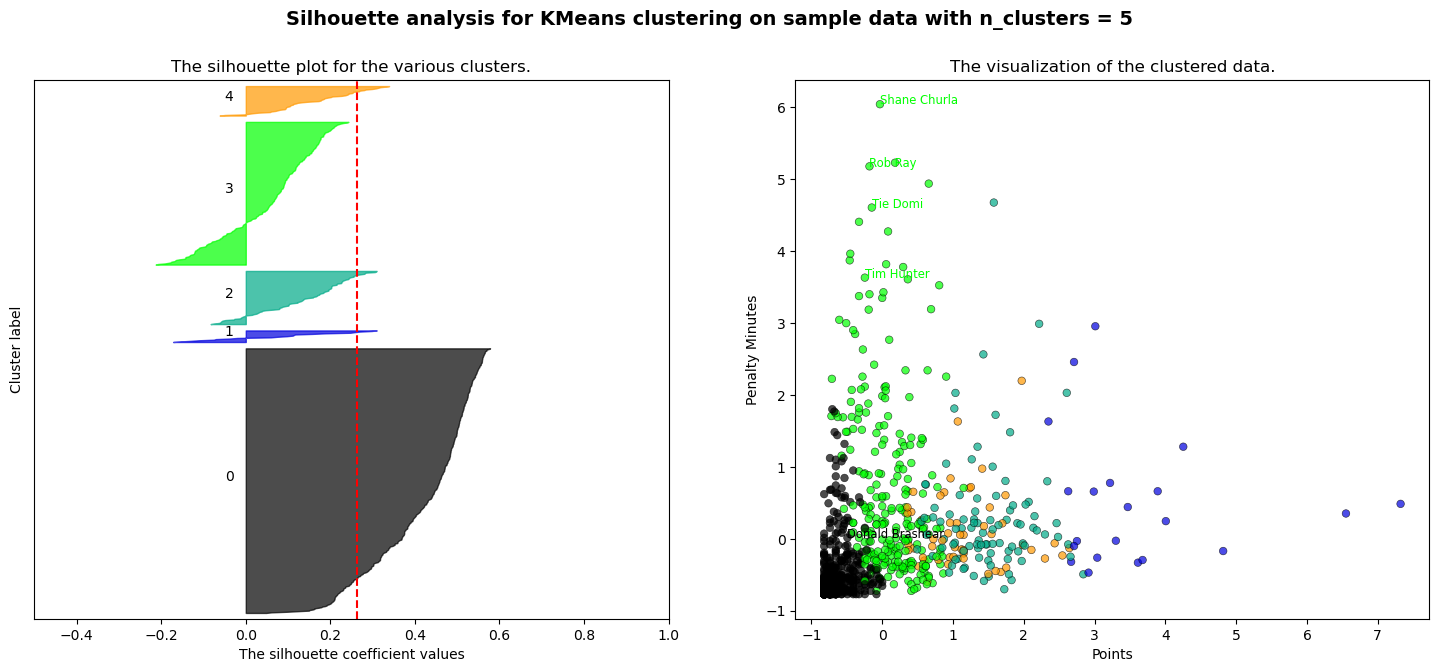

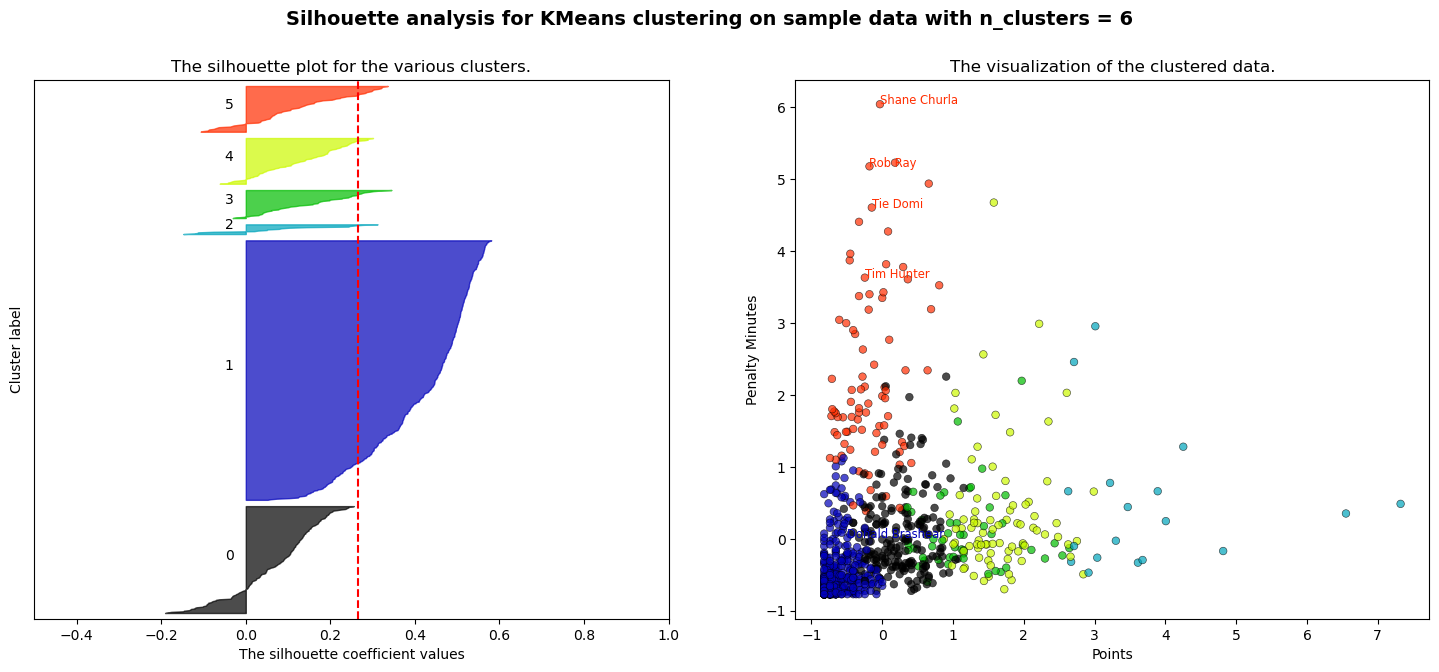

In [35]:
cluster_no_pca(X1, player1)

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMe

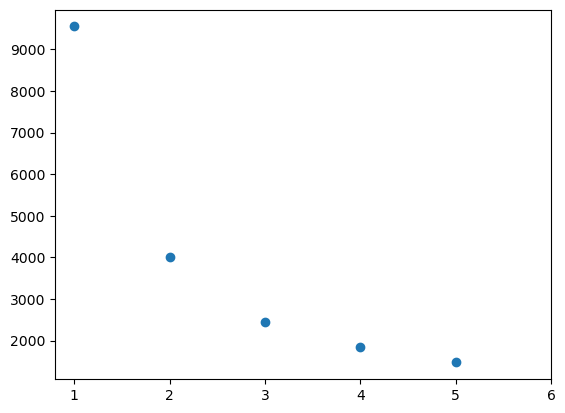

In [36]:
scree_plot(X1)

#### Group 2 w/o PCA

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.4371706100058167


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.2869306524681657


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.22072733695212976


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.19157343236721144


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.19936628035424767


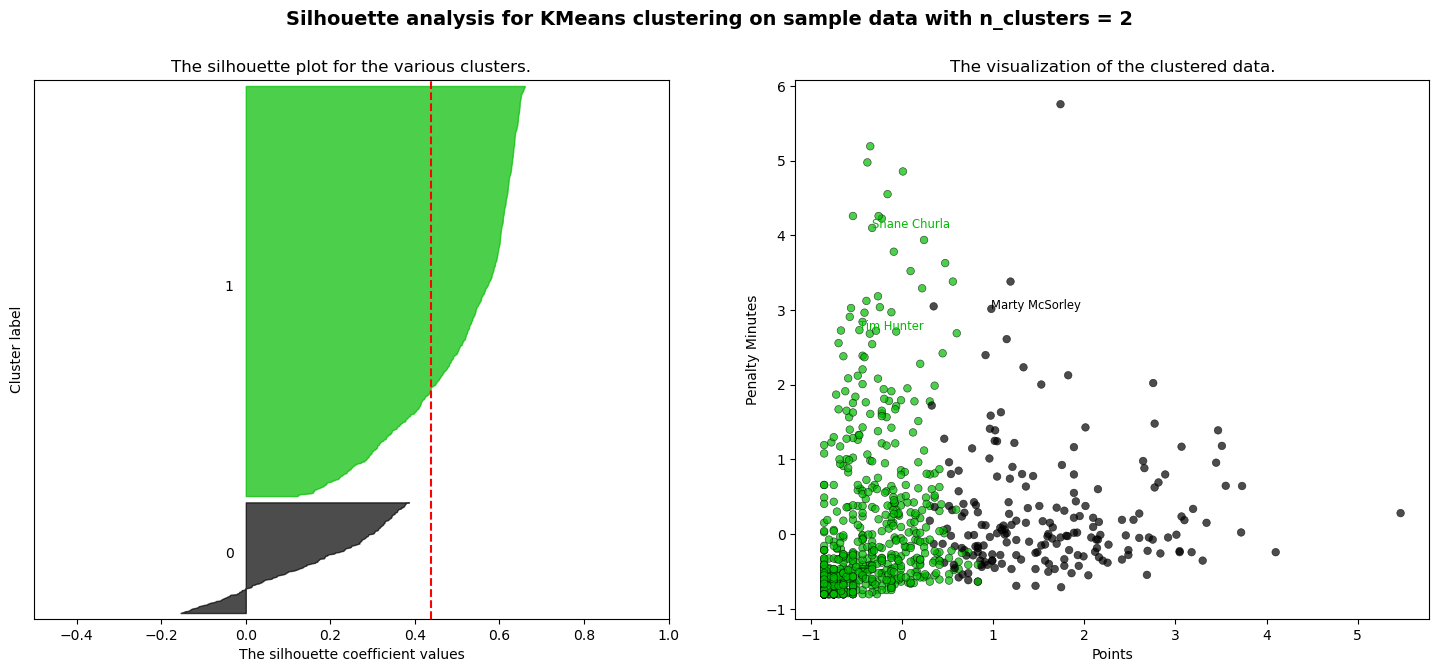

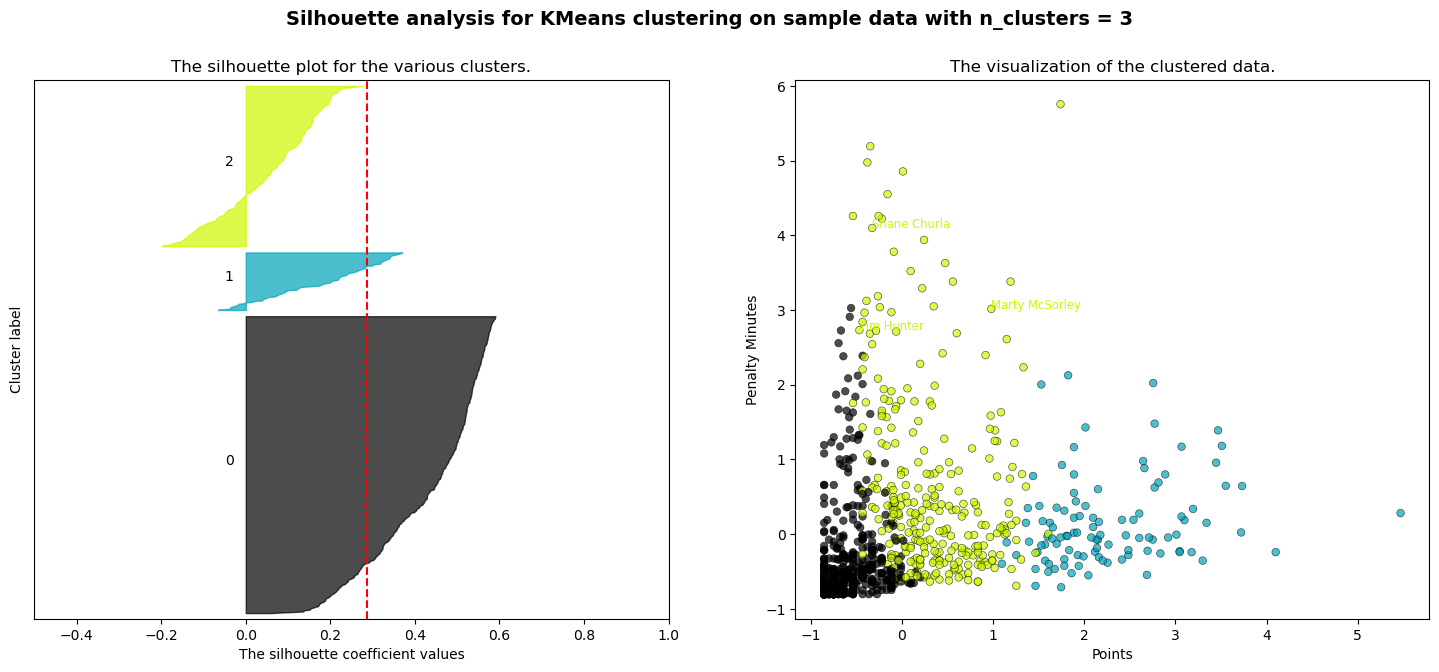

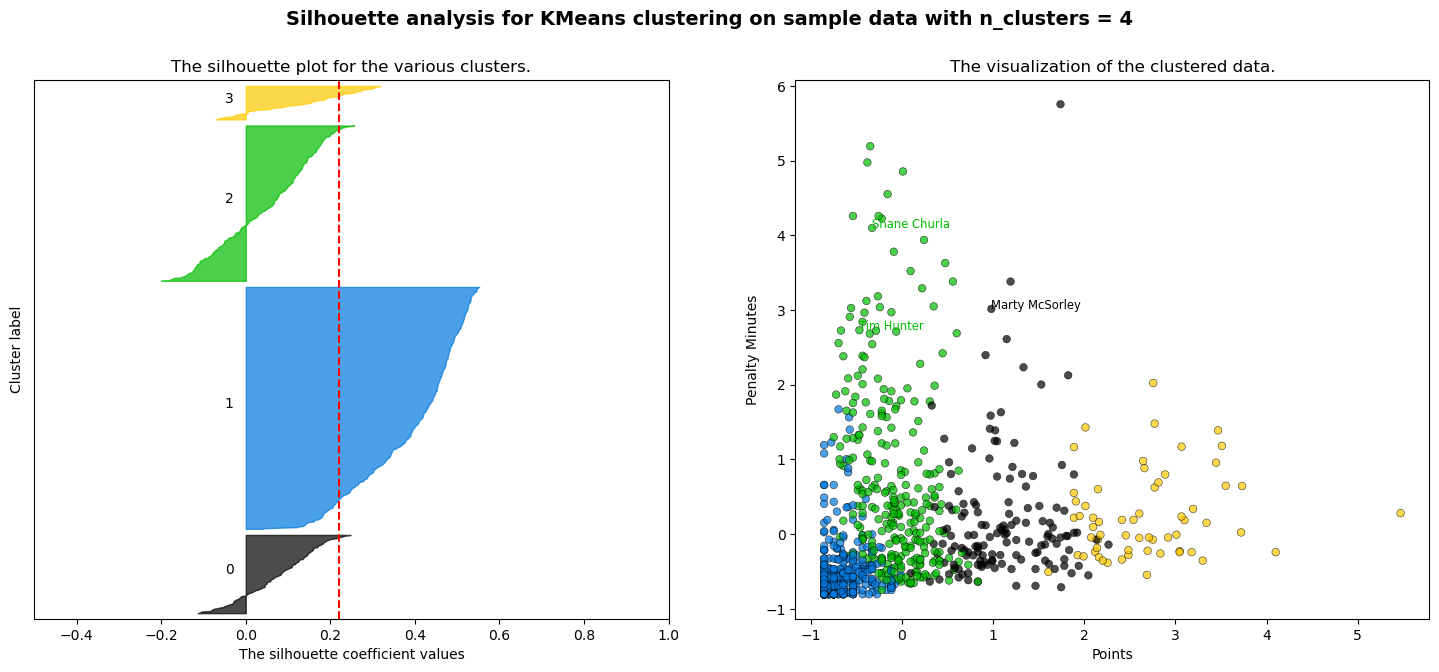

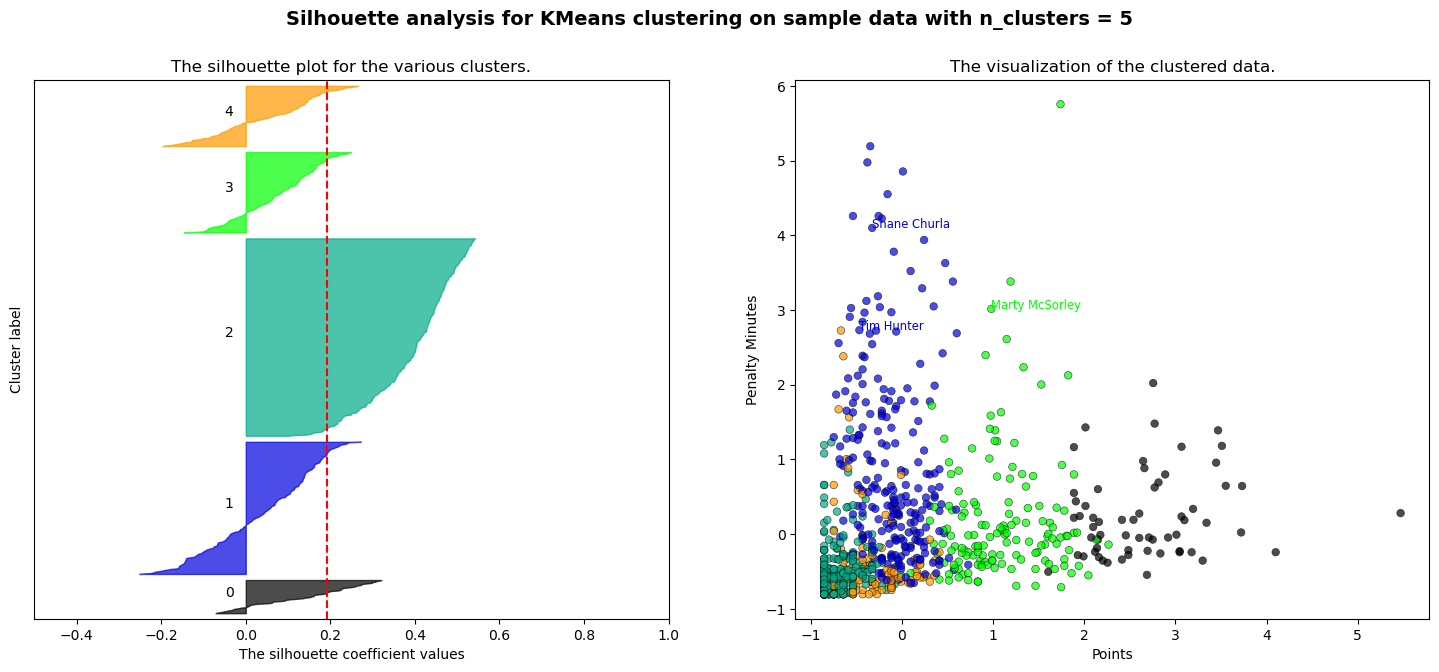

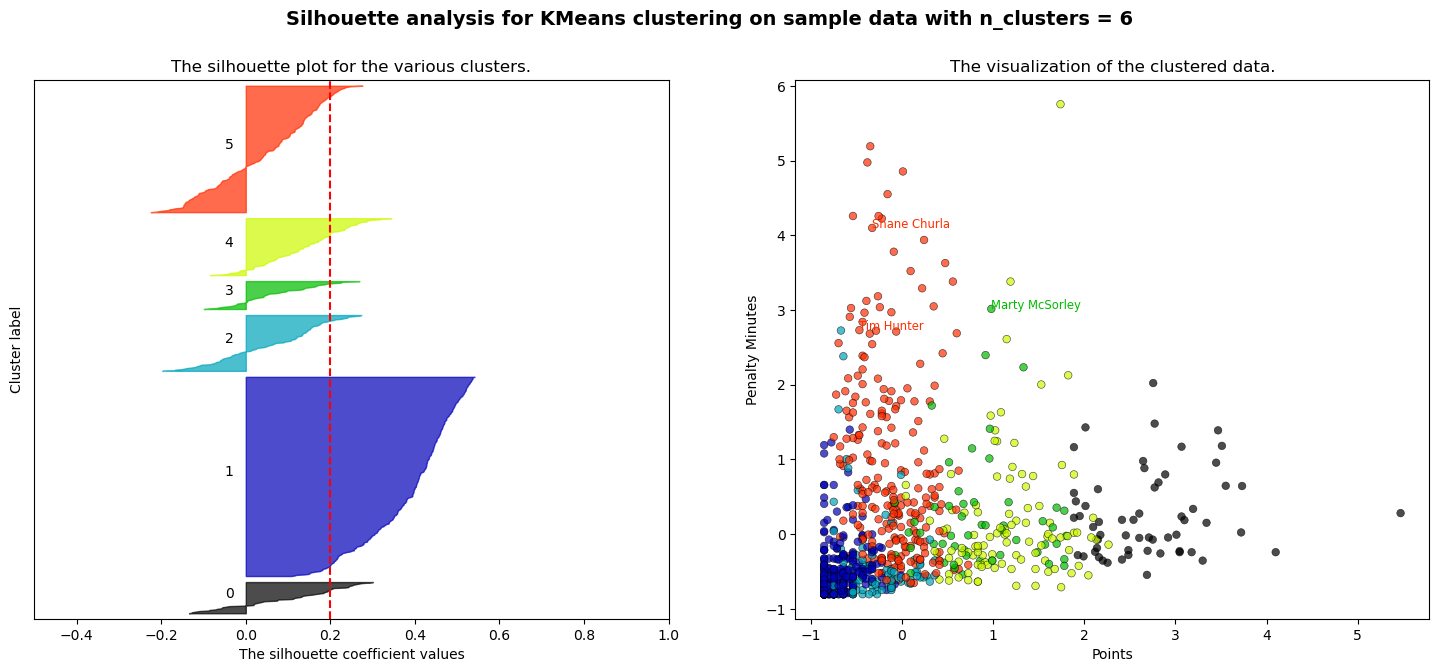

In [37]:
cluster_no_pca(X2, player2)

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMe

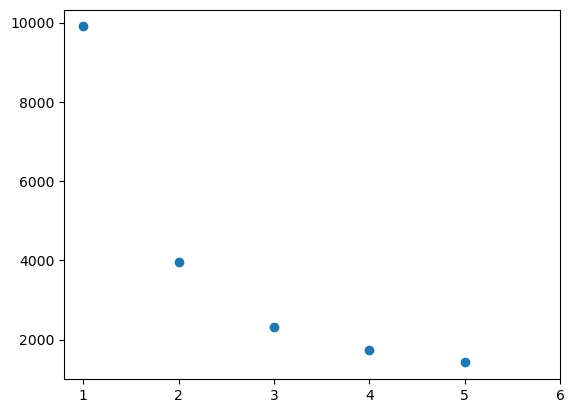

In [38]:
scree_plot(X2)

#### Group 3 w/o PCA

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.44561669100512635


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.3030098773701639


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.24125520656846403


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.2546576083785921


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.21467804027341947


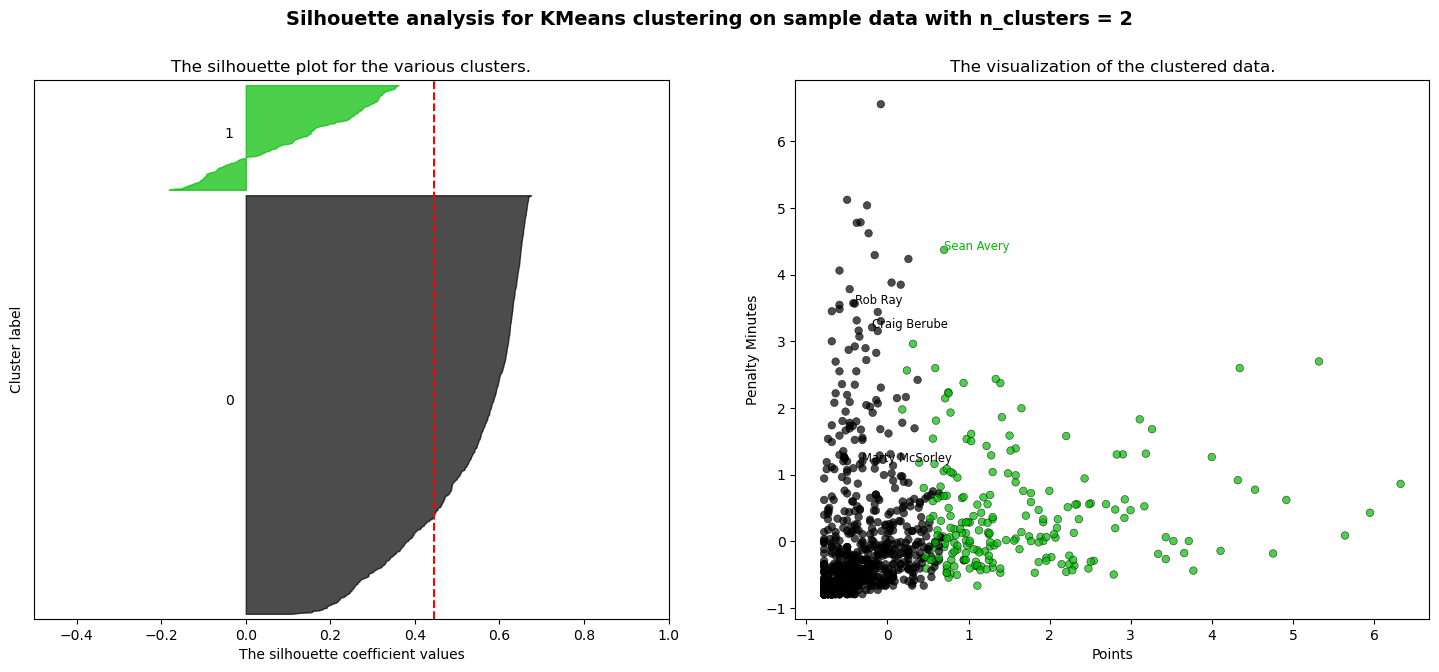

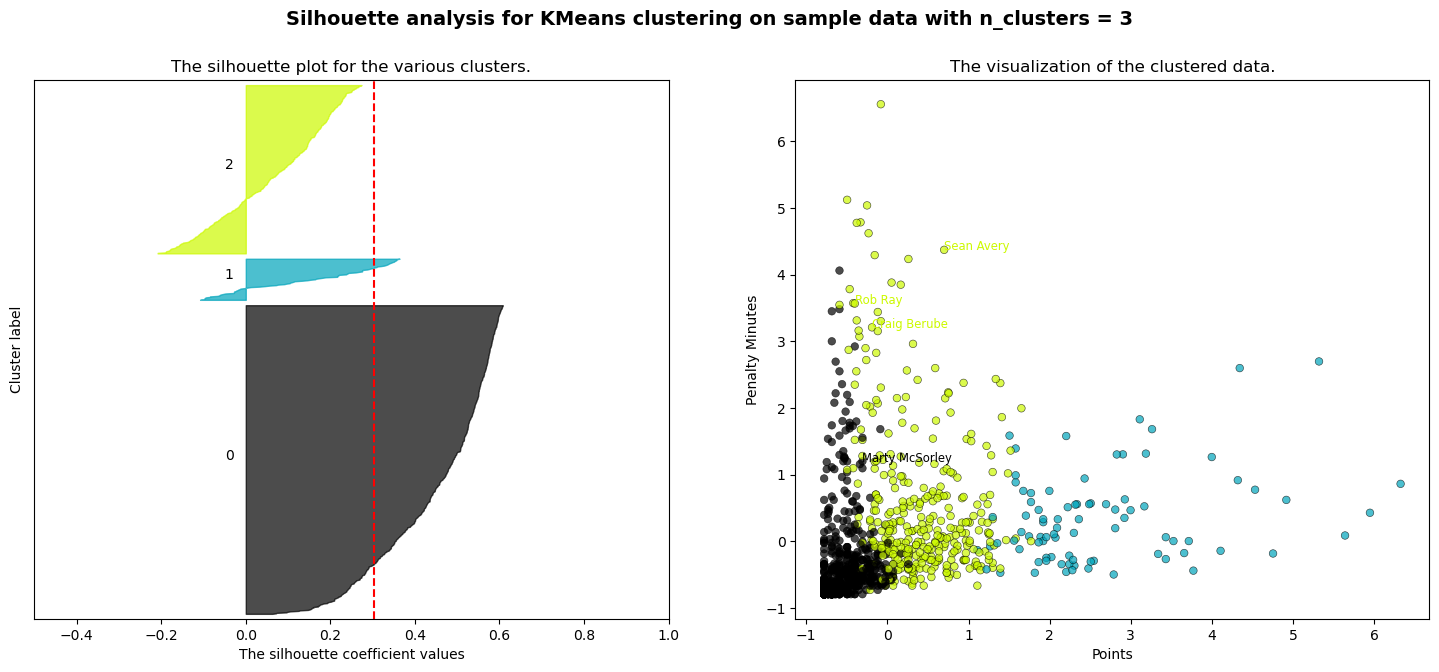

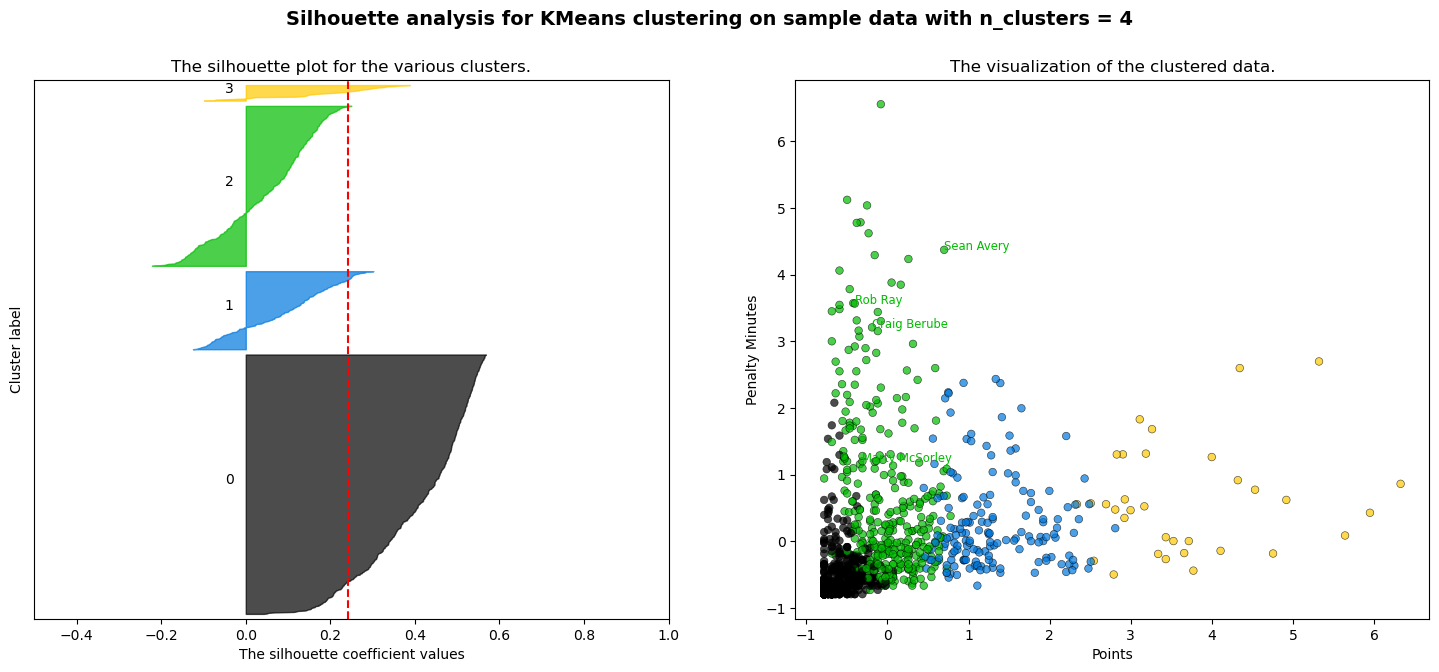

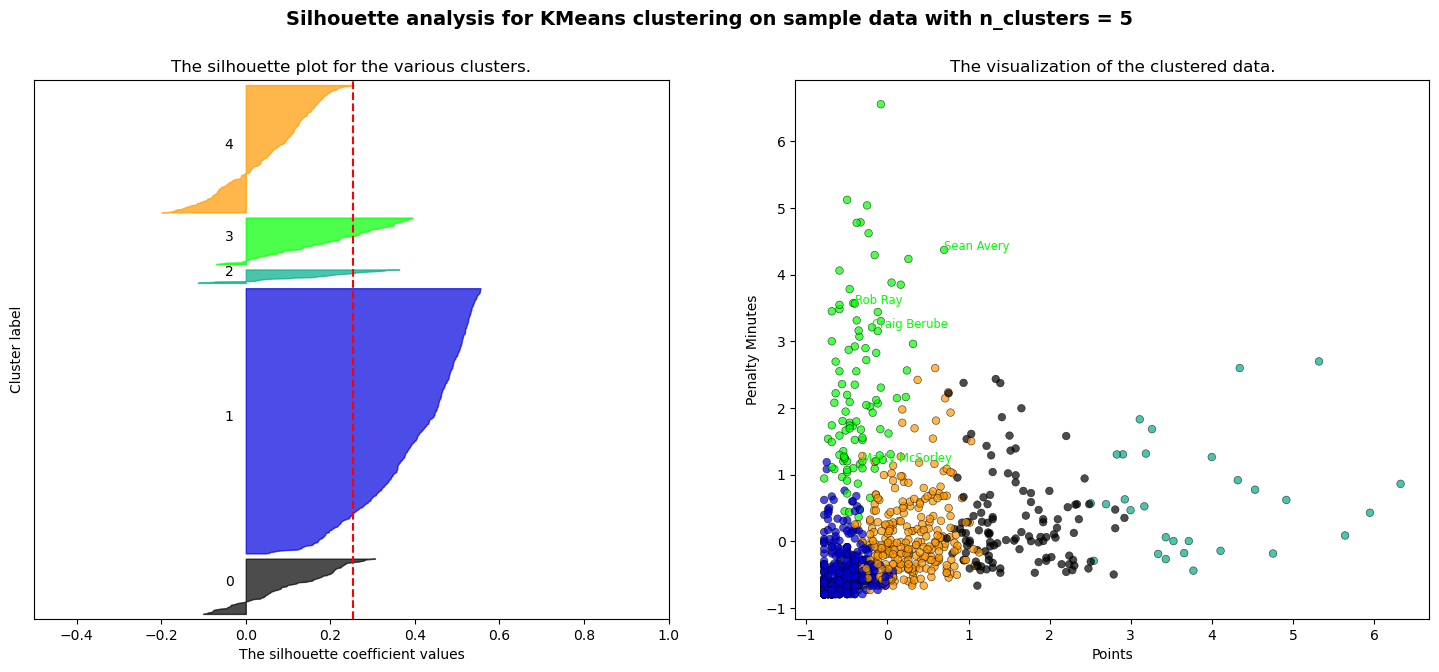

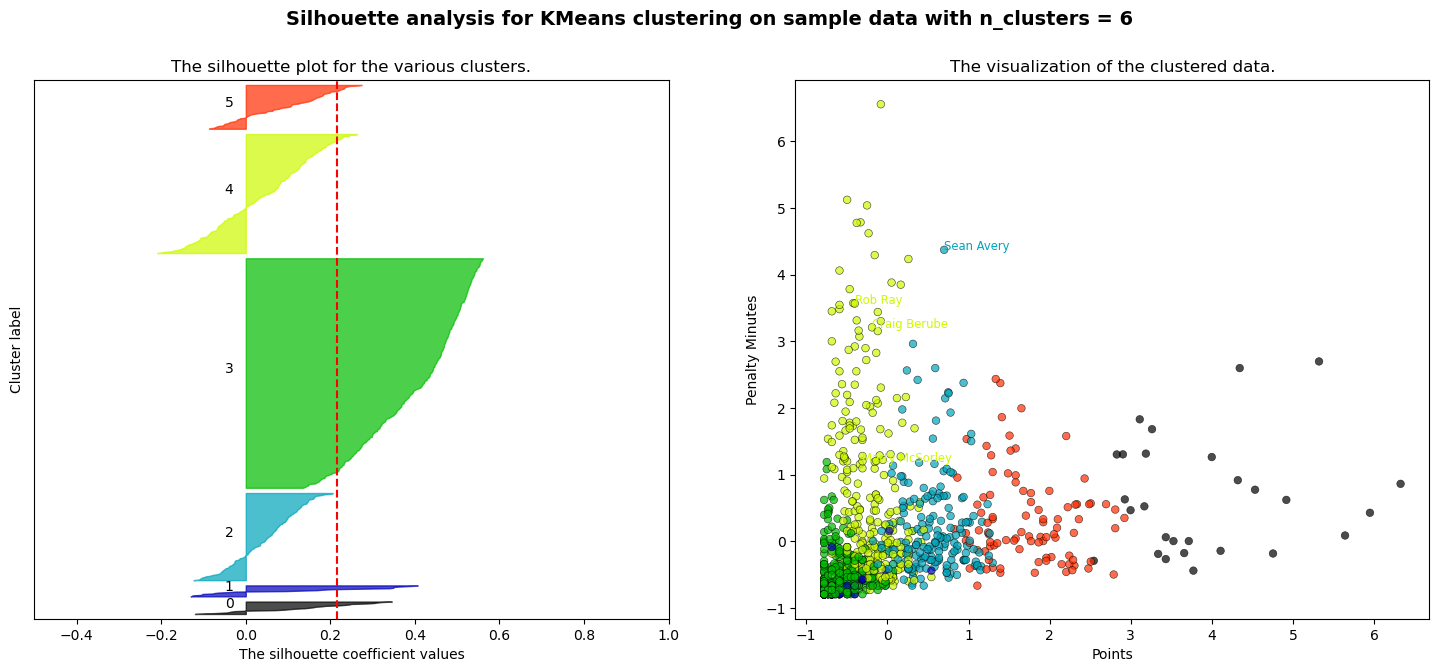

In [39]:
cluster_no_pca(X3, player3)

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMe

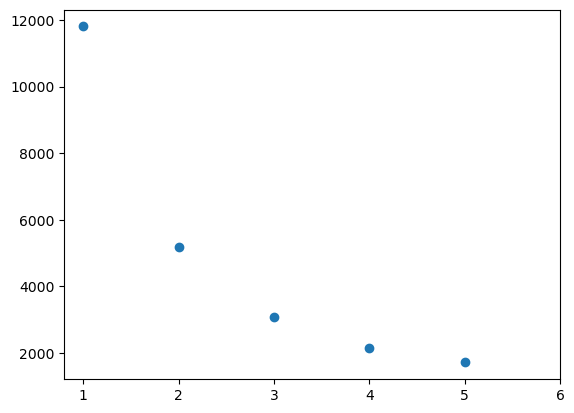

In [40]:
scree_plot(X3)

#### Group 4 w/o PCA

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.41702807866923364


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.31526007095754444


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.26275006897882824


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.2471041857124745


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.24032517189901662


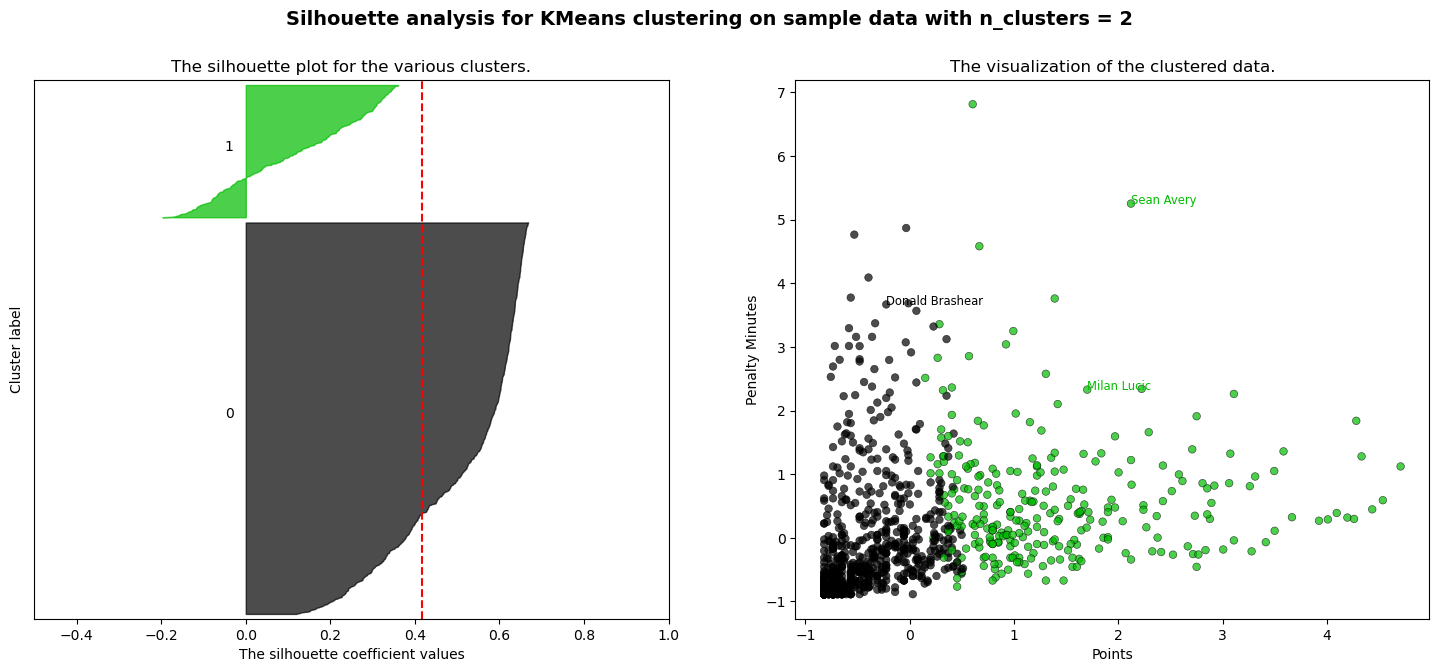

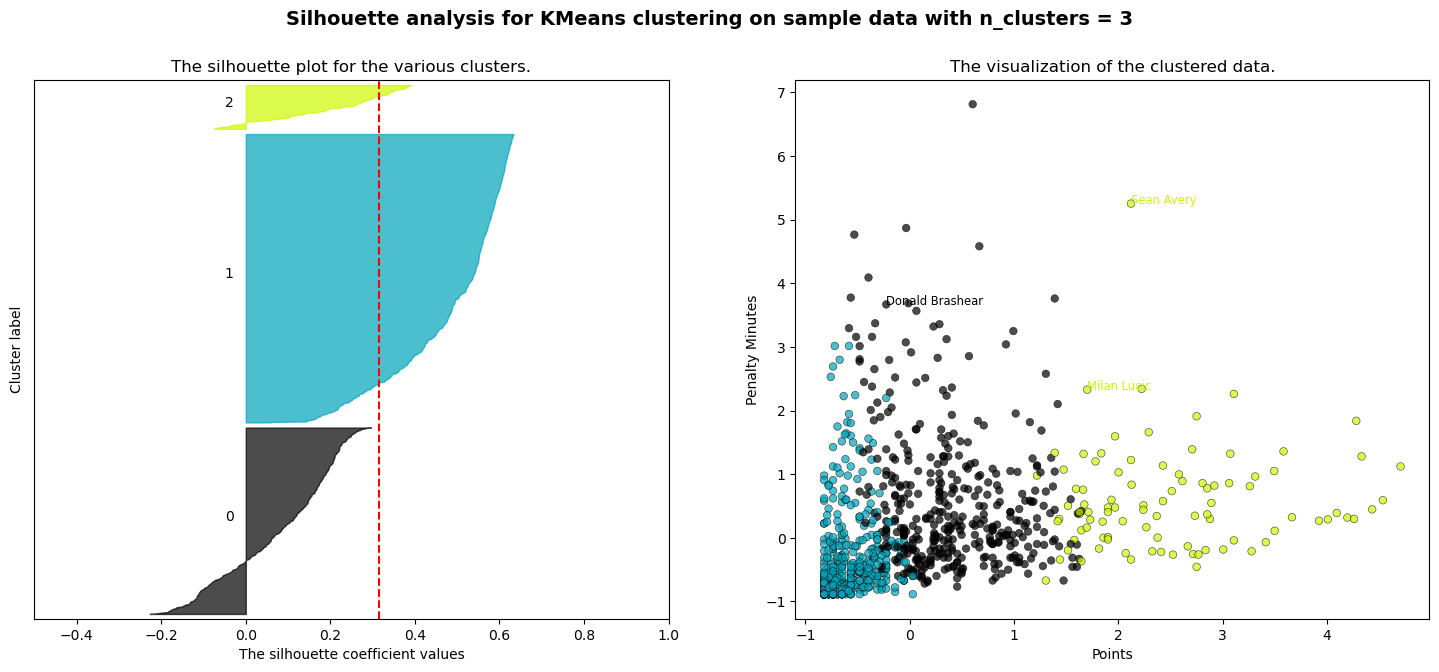

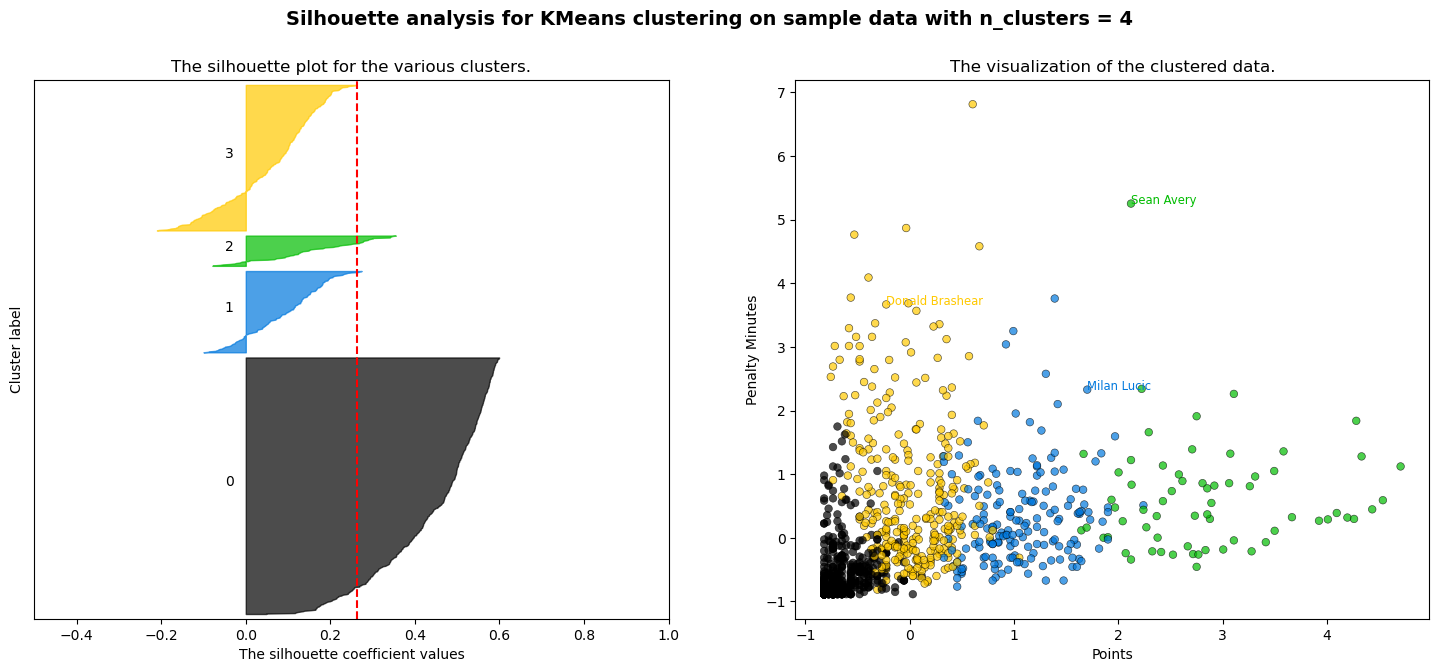

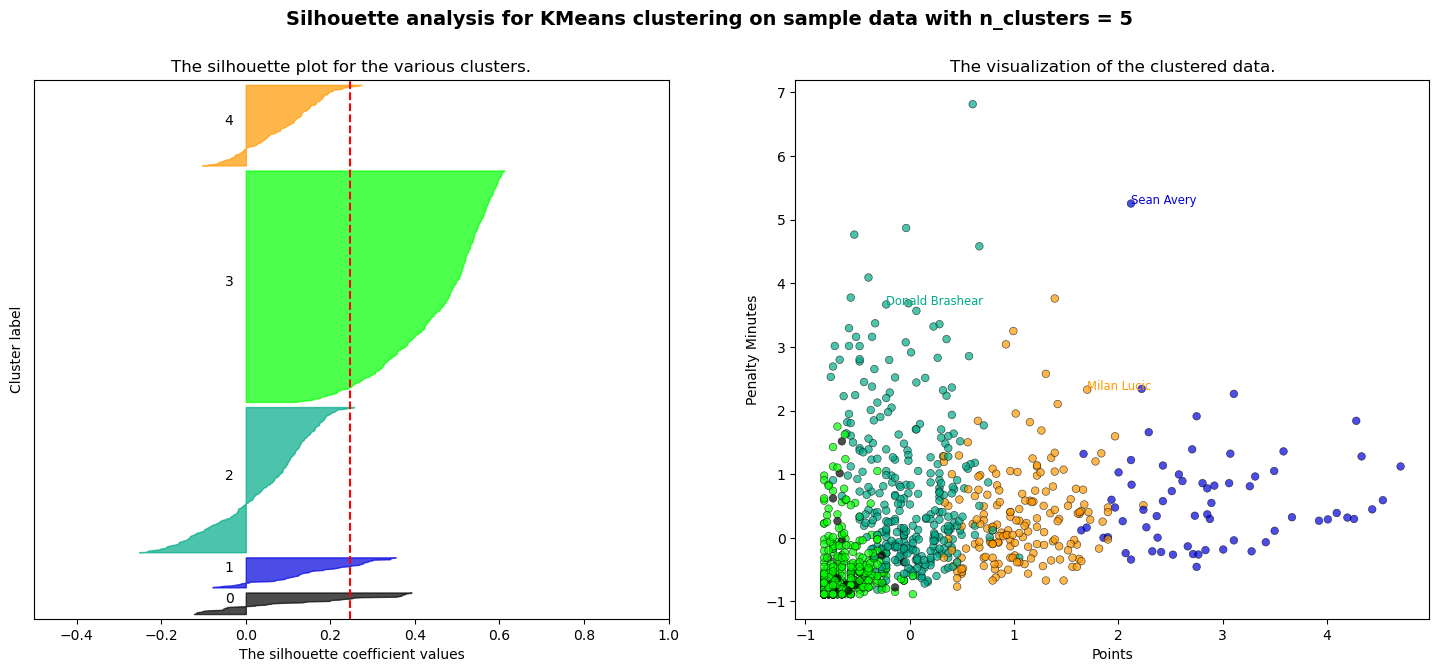

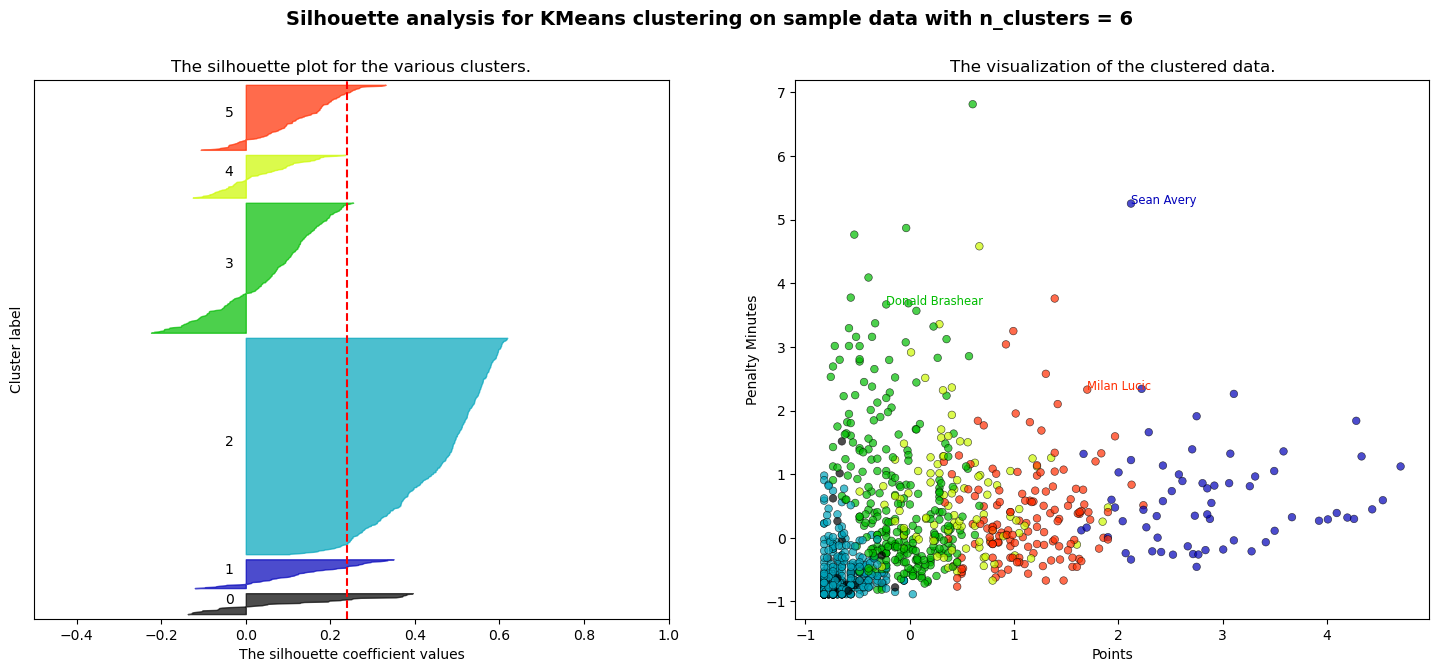

In [41]:
cluster_no_pca(X4, player4)

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMe

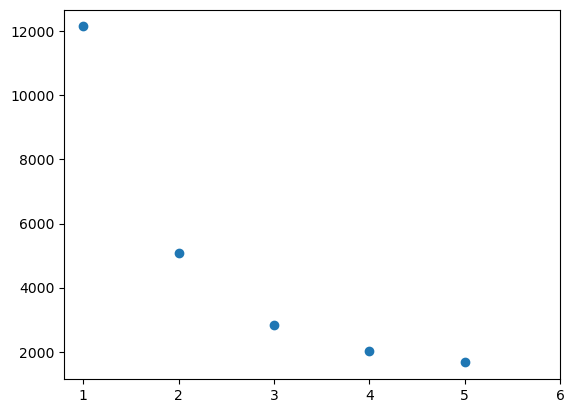

In [42]:
scree_plot(X4)

#### Group 5 w/o PCA

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.45032622986690646


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.29246312677783554


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.25507744599576804


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.2429100620984398


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.27520613496537183


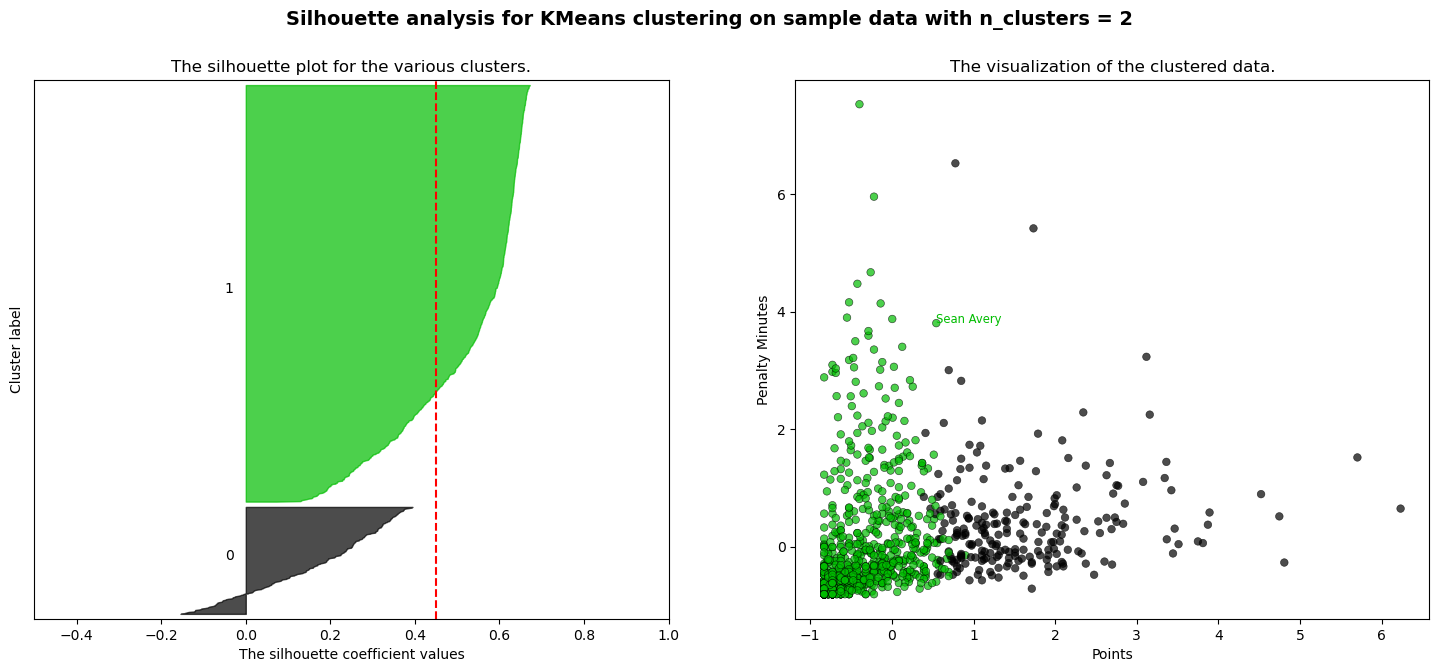

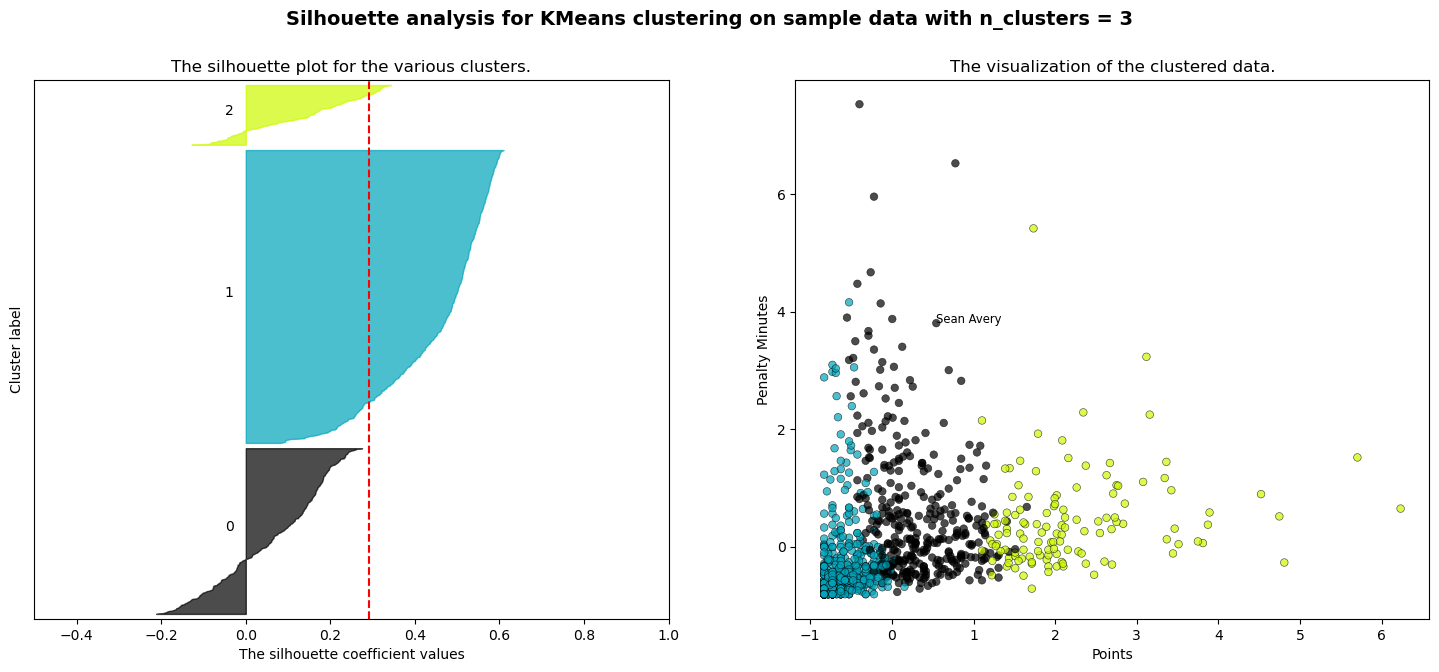

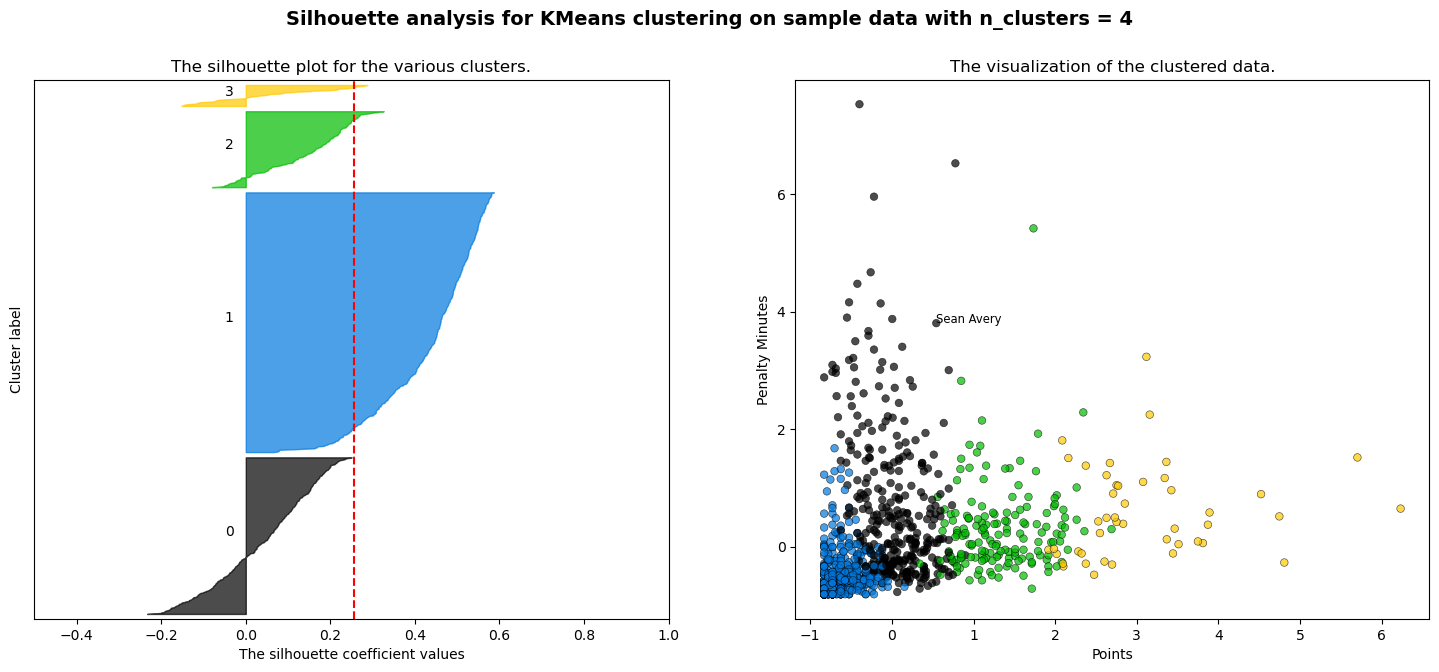

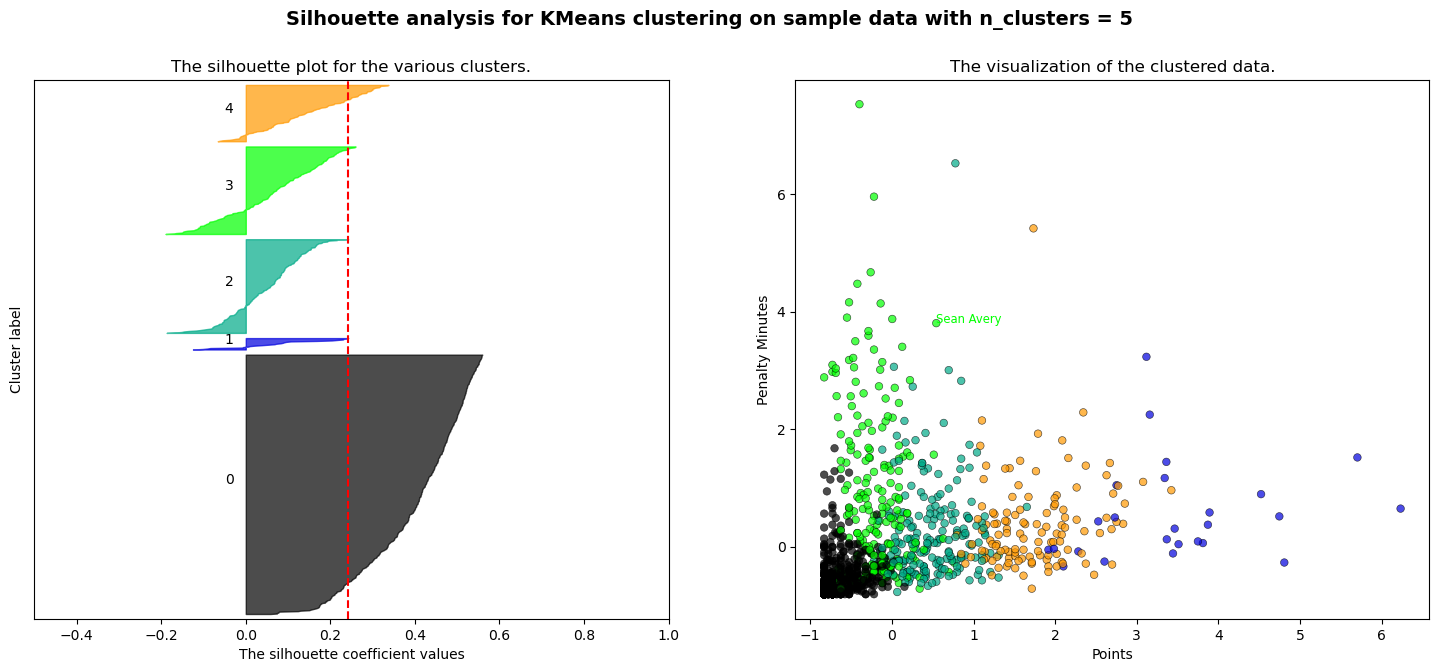

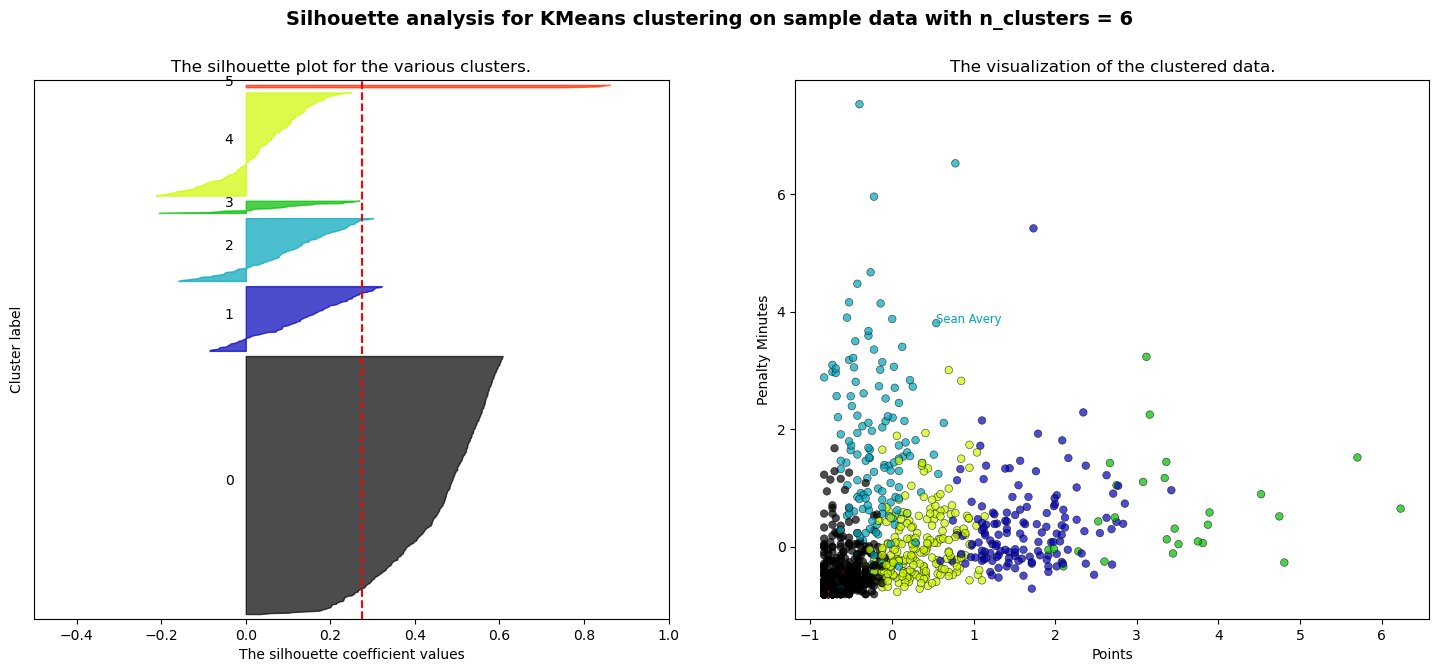

In [43]:
cluster_no_pca(X5, player5)

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMe

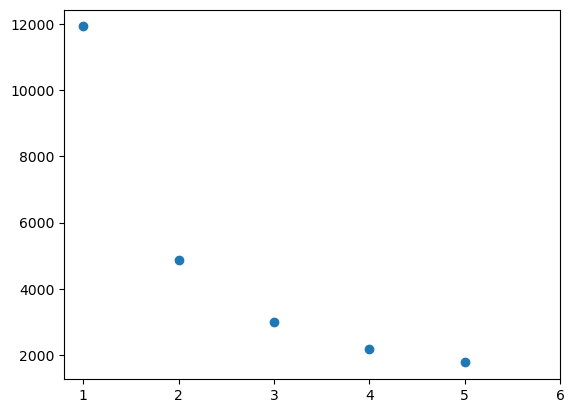

In [44]:
scree_plot(X5)

#### Group 6 w/o PCA

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.41486232404436213


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.2961625236003797


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.2753398196304746


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.2641161825351745


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.26749529672243105


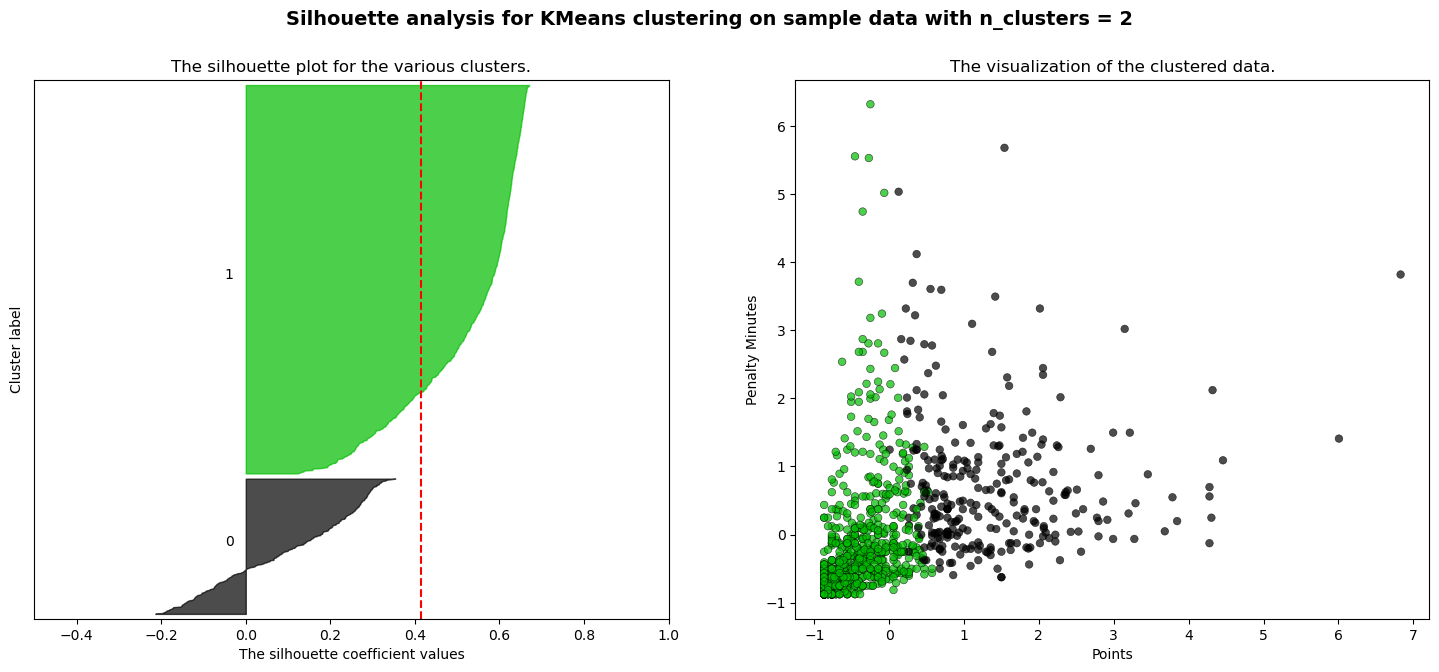

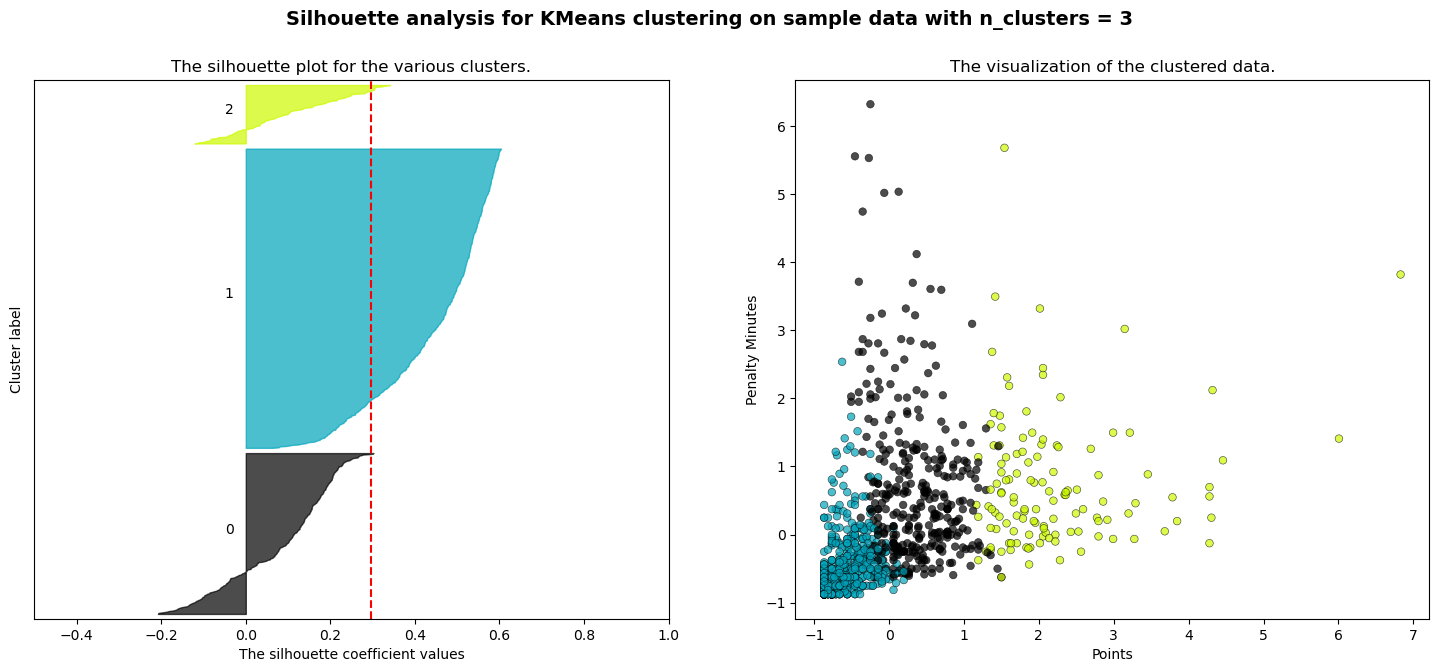

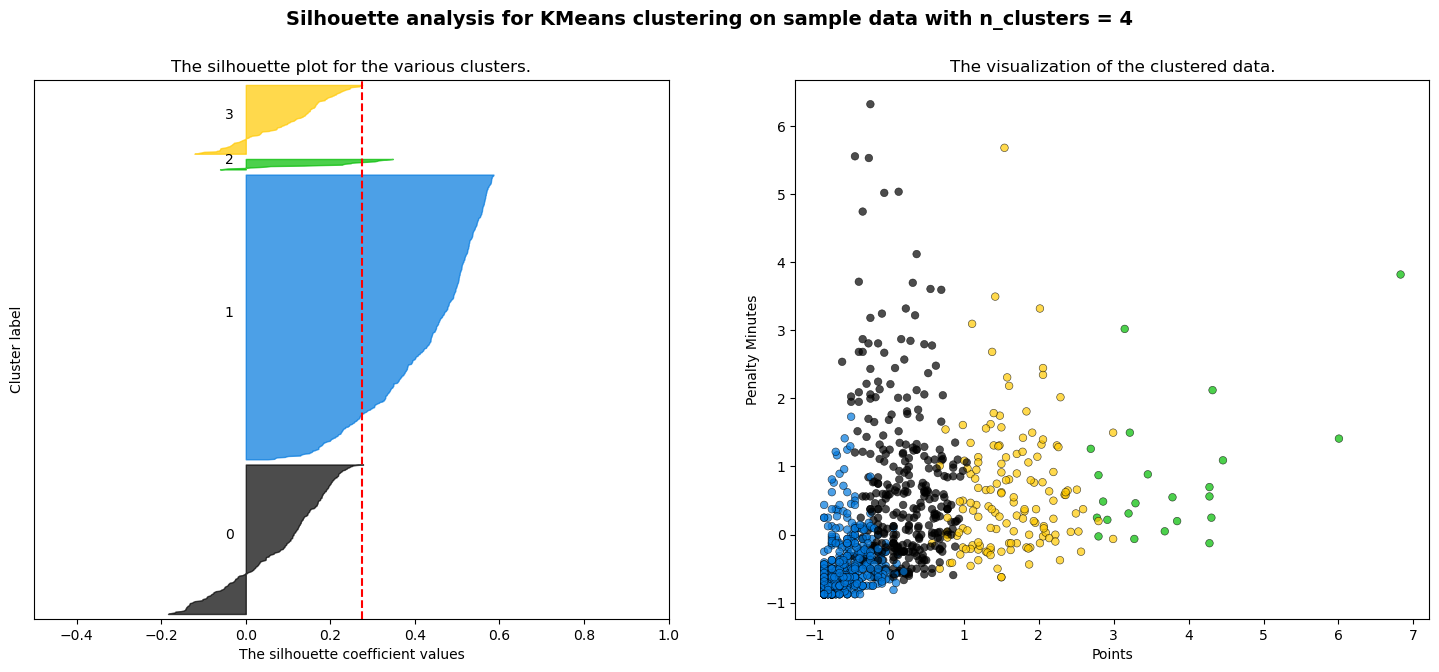

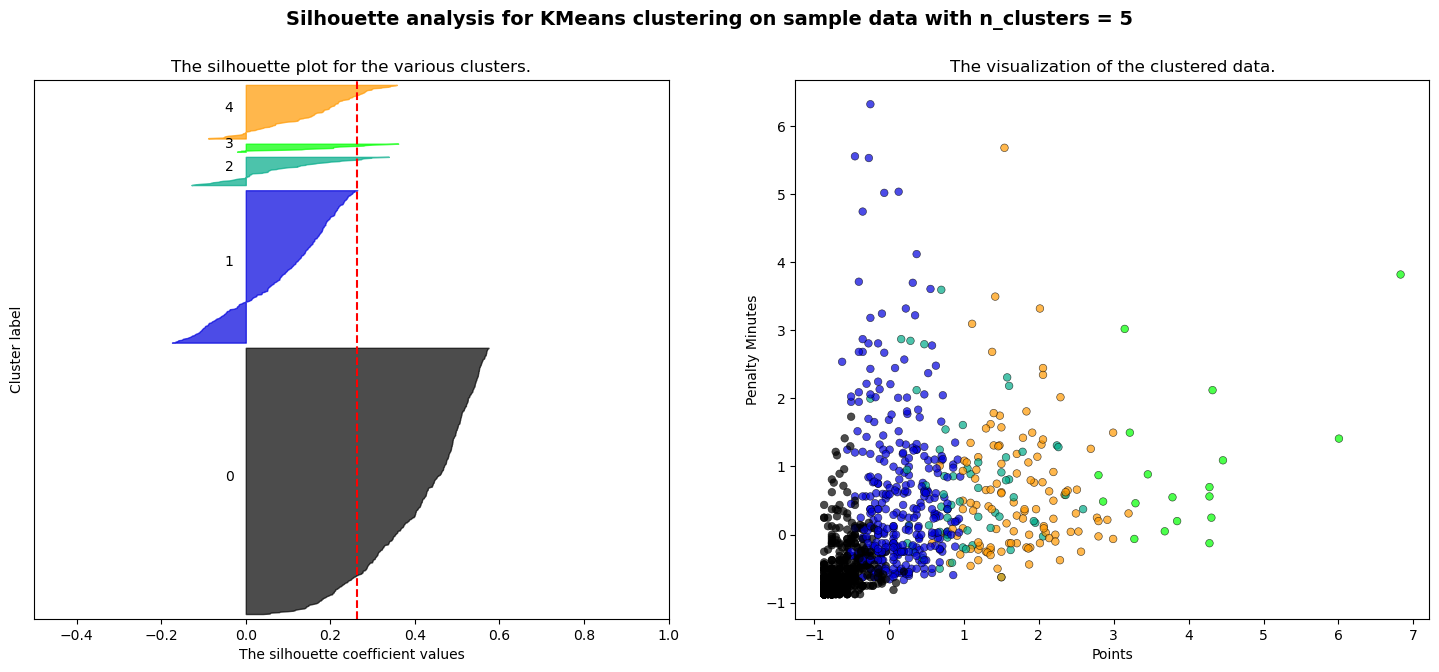

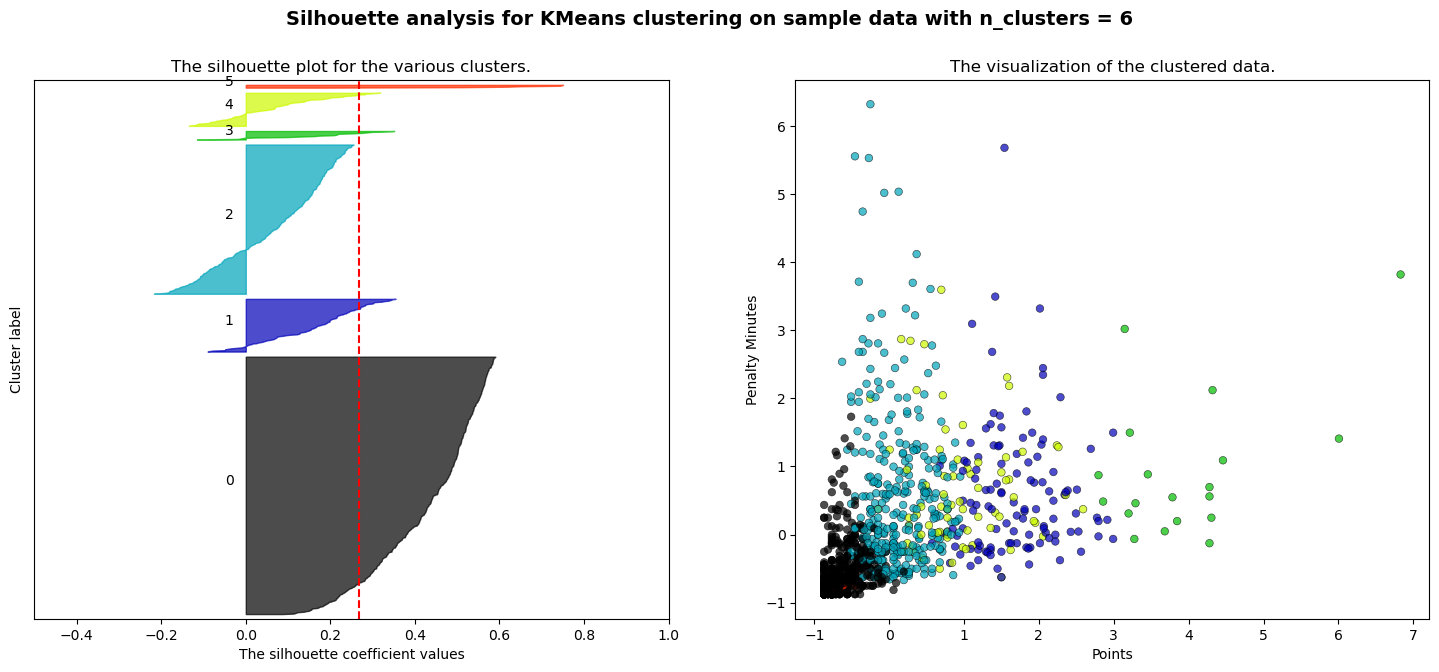

In [45]:
cluster_no_pca(X6, player6)

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMe

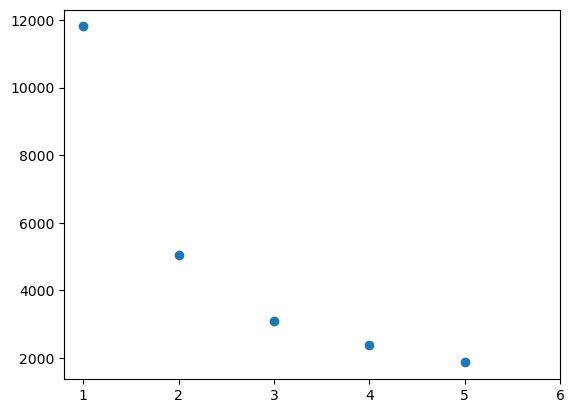

In [46]:
scree_plot(X6)

### Next section